In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
pd.set_option('display.max_columns', 23)

In [316]:
df = pd.read_csv('distances_0_15000.csv')
#df2 = pd.read_csv('distances_4168_50.csv')
#df3 = pd.read_csv('distances_8449_50.csv')
#df = pd.concat((df, df2, df3))
orig_cols = df.columns

In [317]:
df

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy
0,2754514122090479619,144.0,1.472000e+03,496.0,1.000000e+10,480.0,1.392000e+03,1568.0,688.0,1.040000e+03,272.0,288.0,496.0,384.0,1.000000e+10,768.0,384.0,768.0
1,4336122016227655687,288.0,8.800000e+02,864.0,1.000000e+10,800.0,1.000000e+10,1088.0,1344.0,1.000000e+10,176.0,288.0,672.0,768.0,1.000000e+10,384.0,768.0,1152.0
2,-8043991884437127153,192.0,1.000000e+10,560.0,1.000000e+10,464.0,7.360000e+02,1696.0,832.0,9.760000e+02,672.0,512.0,368.0,384.0,1.000000e+10,1152.0,384.0,768.0
3,-1641562064176545777,288.0,1.280000e+03,928.0,1.000000e+10,992.0,1.000000e+10,1696.0,928.0,9.760000e+02,672.0,672.0,816.0,384.0,1.000000e+10,384.0,1152.0,1152.0
4,9100085997055508497,400.0,1.000000e+10,448.0,1.000000e+10,400.0,1.000000e+10,1936.0,800.0,1.120000e+03,304.0,992.0,848.0,384.0,1.000000e+10,384.0,384.0,1152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,8790182047697114961,272.0,8.000000e+02,640.0,1.000000e+10,688.0,1.000000e+10,880.0,656.0,1.488000e+03,448.0,368.0,720.0,384.0,1.000000e+10,384.0,768.0,1152.0
14996,-7809523228837111973,480.0,1.344000e+03,880.0,9.760000e+02,848.0,1.000000e+10,1376.0,160.0,1.472000e+03,320.0,480.0,864.0,0.0,1.000000e+10,768.0,768.0,1152.0
14997,-5586996812729772205,224.0,1.000000e+10,288.0,8.800000e+02,528.0,1.000000e+10,1648.0,880.0,1.392000e+03,240.0,848.0,656.0,768.0,1.000000e+10,768.0,384.0,1152.0
14998,-5112430001995606189,128.0,2.880000e+02,688.0,1.328000e+03,816.0,1.000000e+10,1024.0,1424.0,1.000000e+10,240.0,832.0,960.0,1152.0,1.000000e+10,384.0,768.0,1152.0


In [318]:
df.describe()

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy
count,1.500000e+04,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,4.002848e+16,297.109333,4.576000e+09,1.800050e+07,3.913334e+09,8.000482e+06,5.362667e+09,1466.909867,863.996800,2.098001e+09,276.914133,543.115733,9.133388e+07,703.360000,9.913333e+09,757.376000,503.424000,972.057600
std,5.299664e+18,104.696964,4.982156e+09,4.238962e+08,4.880649e+09,2.827390e+08,4.986996e+09,498.051171,339.365416,4.071793e+09,131.854883,255.276770,9.513421e+08,341.749219,9.269373e+08,322.715766,329.449041,274.154134
min,-9.223372e+18,0.000000,3.200000e+01,0.000000e+00,1.600000e+01,0.000000e+00,3.200000e+01,128.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,-4.611475e+18,224.000000,8.800000e+02,2.560000e+02,7.680000e+02,2.400000e+02,1.104000e+03,992.000000,672.000000,8.800000e+02,192.000000,320.000000,3.040000e+02,384.000000,1.000000e+10,384.000000,384.000000,768.000000
50%,4.982107e+16,304.000000,1.384000e+03,4.800000e+02,1.280000e+03,4.480000e+02,1.000000e+10,1712.000000,864.000000,1.248000e+03,256.000000,544.000000,5.120000e+02,768.000000,1.000000e+10,768.000000,384.000000,1152.000000
75%,4.627167e+18,368.000000,1.000000e+10,6.880000e+02,1.000000e+10,6.720000e+02,1.000000e+10,1856.000000,1152.000000,1.440000e+03,336.000000,768.000000,7.680000e+02,768.000000,1.000000e+10,1152.000000,768.000000,1152.000000
max,9.220557e+18,496.000000,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,2000.000000,1488.000000,1.000000e+10,992.000000,992.000000,1.000000e+10,1152.000000,1.000000e+10,1152.000000,1152.000000,1152.000000


In [319]:
df.min(axis=0)

seed               -9.223372e+18
village             0.000000e+00
swamp_hut           3.200000e+01
shipwreck           0.000000e+00
pillager_outpost    1.600000e+01
ocean_ruin          0.000000e+00
monument            3.200000e+01
mansion             1.280000e+02
jungle_pyramid      0.000000e+00
igloo               0.000000e+00
fortress_nether     0.000000e+00
desert_pyramid      0.000000e+00
buried_treasure     0.000000e+00
jungles             0.000000e+00
mushrooms           0.000000e+00
mesas               0.000000e+00
oceans              0.000000e+00
icy                 0.000000e+00
dtype: float64

In [320]:
# removing noninteresting cols
#df = df.drop(columns=['ocean_ruin', 'buried_treasure'])

In [321]:
distances = set(df.columns) - {'seed'}
good_distances = set(distances) - {'pillager_outpost', 'monument', 'mushrooms', 'swamp_hut', 'igloo'}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0B2231908>,
      dtype=object)

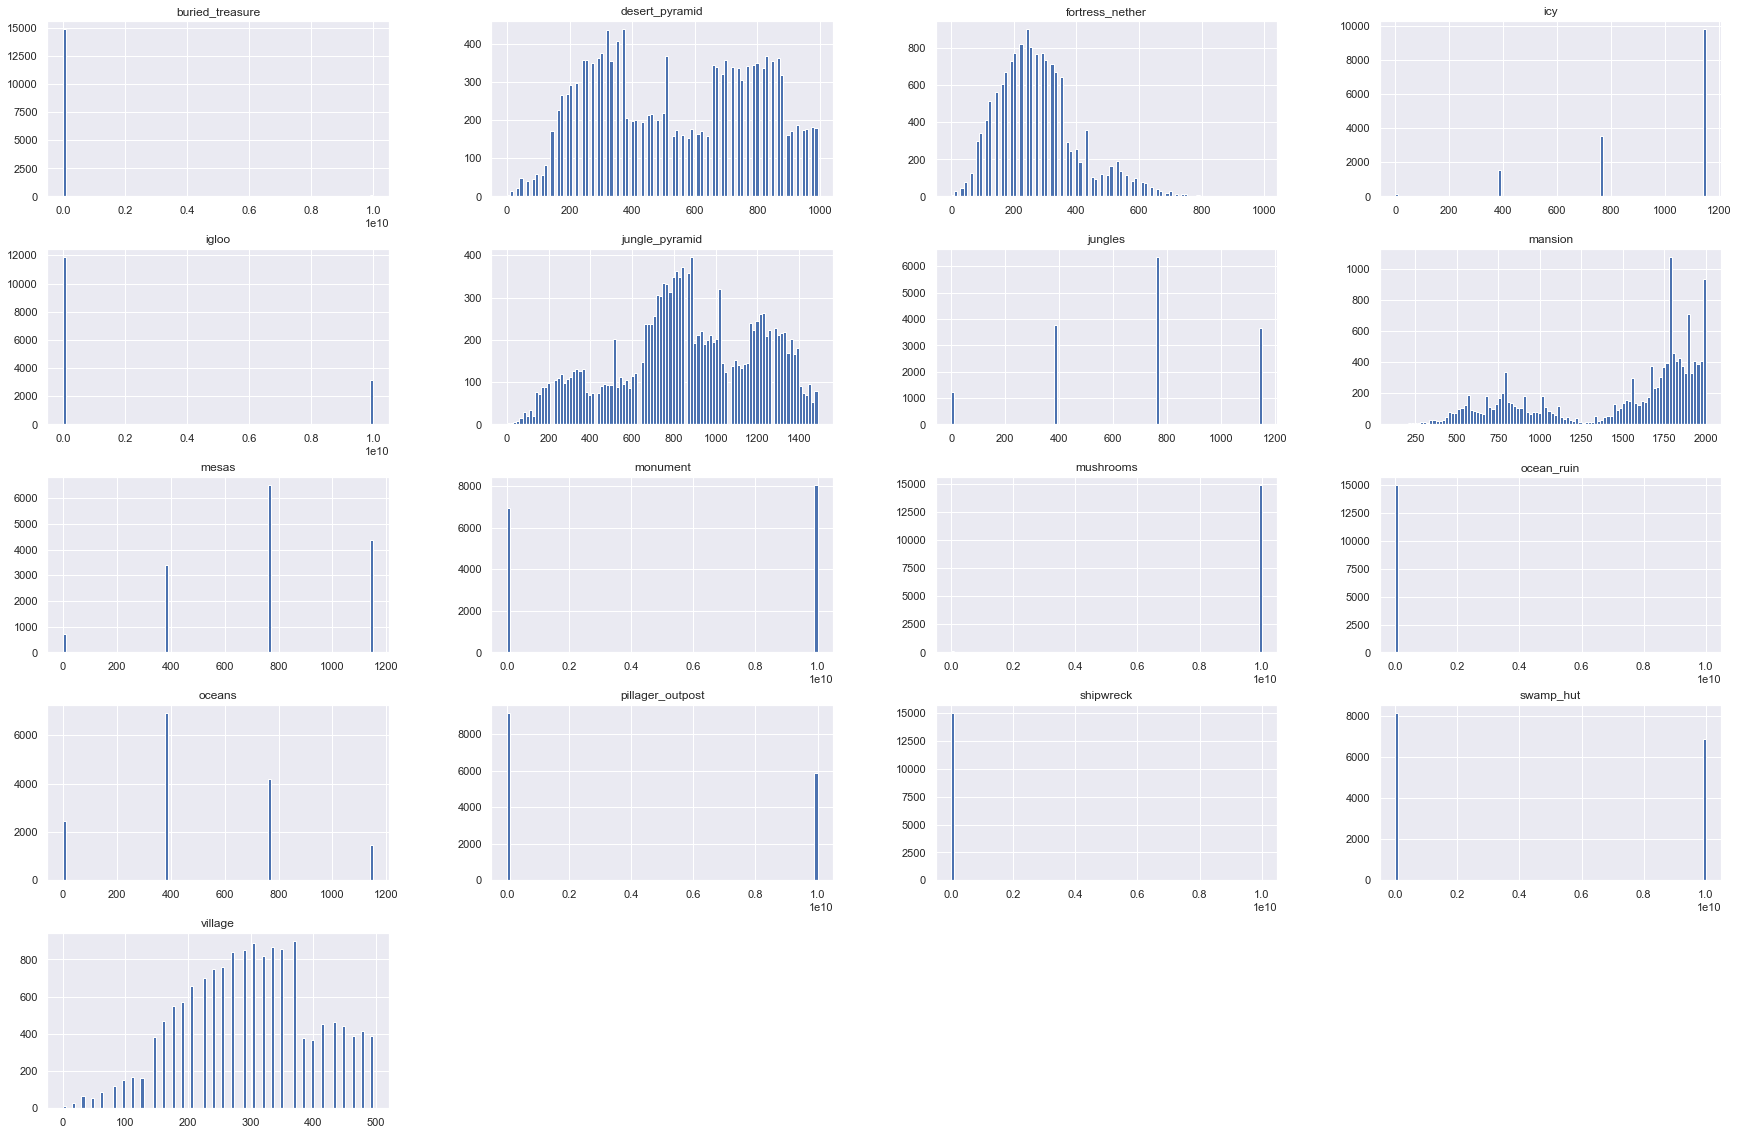

In [322]:
#for column in set(df.columns) - {'seed'}:
#    df[column].hist(figsize=(10, 6), bins=100)
#    plt.title(column)
#    plt.show()
df[distances].hist(figsize=(30, 20), bins=100)

In [323]:
close = df[good_distances].max(axis=1) < 1e6
df_close = df[close]

In [324]:
df.shape

(15000, 18)

In [325]:
df_close.shape

(14835, 18)

In [326]:
df[good_distances]

,desert_pyramid,buried_treasure,jungle_pyramid,jungles,mesas,mansion,ocean_ruin,fortress_nether,shipwreck,oceans,village,icy
0,288.0,496.0,688.0,384.0,768.0,1568.0,480.0,272.0,496.0,384.0,144.0,768.0
1,288.0,672.0,1344.0,768.0,384.0,1088.0,800.0,176.0,864.0,768.0,288.0,1152.0
2,512.0,368.0,832.0,384.0,1152.0,1696.0,464.0,672.0,560.0,384.0,192.0,768.0
3,672.0,816.0,928.0,384.0,384.0,1696.0,992.0,672.0,928.0,1152.0,288.0,1152.0
4,992.0,848.0,800.0,384.0,384.0,1936.0,400.0,304.0,448.0,384.0,400.0,1152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,368.0,720.0,656.0,384.0,384.0,880.0,688.0,448.0,640.0,768.0,272.0,1152.0
14996,480.0,864.0,160.0,0.0,768.0,1376.0,848.0,320.0,880.0,768.0,480.0,1152.0
14997,848.0,656.0,880.0,768.0,768.0,1648.0,528.0,240.0,288.0,384.0,224.0,1152.0
14998,832.0,960.0,1424.0,1152.0,384.0,1024.0,816.0,240.0,688.0,768.0,128.0,1152.0


In [327]:
df.quantile(0.2)[df.quantile(0.2) == 1e10]

mushrooms    1.000000e+10
Name: 0.2, dtype: float64

In [328]:
df.describe()

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy
count,1.500000e+04,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,4.002848e+16,297.109333,4.576000e+09,1.800050e+07,3.913334e+09,8.000482e+06,5.362667e+09,1466.909867,863.996800,2.098001e+09,276.914133,543.115733,9.133388e+07,703.360000,9.913333e+09,757.376000,503.424000,972.057600
std,5.299664e+18,104.696964,4.982156e+09,4.238962e+08,4.880649e+09,2.827390e+08,4.986996e+09,498.051171,339.365416,4.071793e+09,131.854883,255.276770,9.513421e+08,341.749219,9.269373e+08,322.715766,329.449041,274.154134
min,-9.223372e+18,0.000000,3.200000e+01,0.000000e+00,1.600000e+01,0.000000e+00,3.200000e+01,128.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,-4.611475e+18,224.000000,8.800000e+02,2.560000e+02,7.680000e+02,2.400000e+02,1.104000e+03,992.000000,672.000000,8.800000e+02,192.000000,320.000000,3.040000e+02,384.000000,1.000000e+10,384.000000,384.000000,768.000000
50%,4.982107e+16,304.000000,1.384000e+03,4.800000e+02,1.280000e+03,4.480000e+02,1.000000e+10,1712.000000,864.000000,1.248000e+03,256.000000,544.000000,5.120000e+02,768.000000,1.000000e+10,768.000000,384.000000,1152.000000
75%,4.627167e+18,368.000000,1.000000e+10,6.880000e+02,1.000000e+10,6.720000e+02,1.000000e+10,1856.000000,1152.000000,1.440000e+03,336.000000,768.000000,7.680000e+02,768.000000,1.000000e+10,1152.000000,768.000000,1152.000000
max,9.220557e+18,496.000000,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,2000.000000,1488.000000,1.000000e+10,992.000000,992.000000,1.000000e+10,1152.000000,1.000000e+10,1152.000000,1152.000000,1152.000000


In [329]:
df[close].describe()

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy
count,1.483500e+04,14835.000000,1.483500e+04,14835.000000,1.483500e+04,14835.000000,1.483500e+04,14835.000000,14835.000000,1.483500e+04,14835.000000,14835.000000,14835.000000,14835.000000,1.483500e+04,14835.000000,14835.000000,14835.000000
mean,3.781138e+16,297.166431,4.599933e+09,496.689181,3.913718e+09,476.322211,5.318504e+09,1467.885406,864.503674,2.096394e+09,276.870644,542.346613,548.137243,704.064712,9.912369e+09,757.464914,497.918706,972.075228
std,5.301454e+18,104.639834,4.984136e+09,296.123255,4.880737e+09,290.668451,4.990013e+09,497.759906,339.195964,4.070649e+09,131.743510,255.242664,315.045537,341.625279,9.320329e+08,322.852069,325.879111,274.280516
min,-9.223372e+18,0.000000,3.200000e+01,0.000000,1.600000e+01,0.000000,3.200000e+01,128.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,-4.613656e+18,224.000000,8.800000e+02,240.000000,7.680000e+02,224.000000,1.088000e+03,992.000000,672.000000,8.880000e+02,192.000000,320.000000,304.000000,384.000000,1.000000e+10,384.000000,384.000000,768.000000
50%,4.813222e+16,304.000000,1.392000e+03,480.000000,1.280000e+03,448.000000,1.000000e+10,1712.000000,864.000000,1.248000e+03,256.000000,528.000000,496.000000,768.000000,1.000000e+10,768.000000,384.000000,1152.000000
75%,4.629278e+18,368.000000,1.000000e+10,672.000000,1.000000e+10,672.000000,1.000000e+10,1856.000000,1152.000000,1.440000e+03,336.000000,768.000000,752.000000,768.000000,1.000000e+10,1152.000000,768.000000,1152.000000
max,9.220557e+18,496.000000,1.000000e+10,1472.000000,1.000000e+10,1472.000000,1.000000e+10,2000.000000,1488.000000,1.000000e+10,992.000000,992.000000,1488.000000,1152.000000,1.000000e+10,1152.000000,1152.000000,1152.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0B773D860>,
      dtype=object)

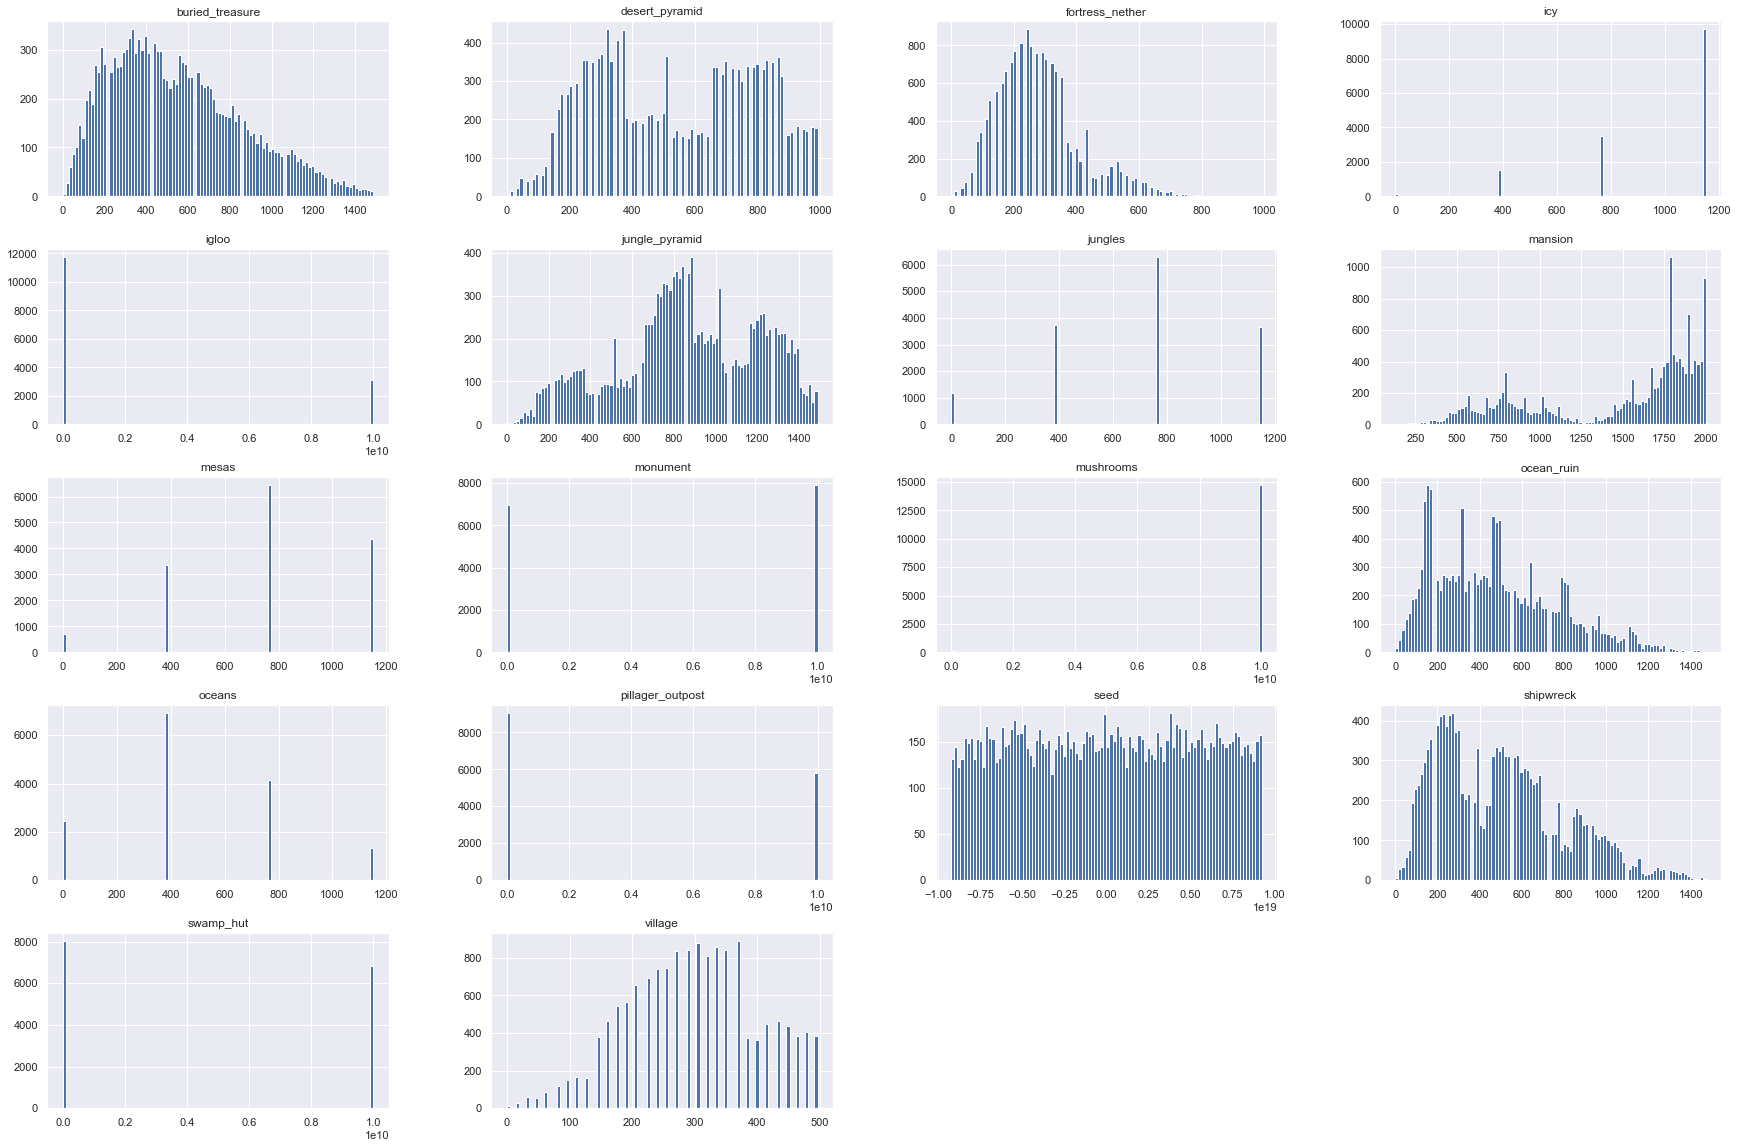

In [330]:
df[close].hist(figsize=(30, 20), bins=100)

In [331]:
normed_dists = df[good_distances].sum(axis=1) - df[good_distances].mean().sum()
df['score'] = normed_dists

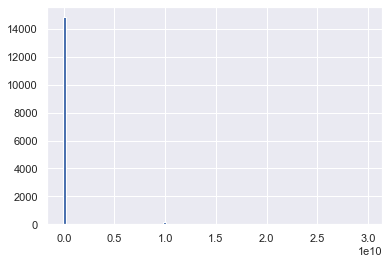

In [332]:
df['score'].hist(bins=100)

In [333]:
df[good_distances].mean().sum()

117341244.26026669

In [334]:
df['sum_dists'] = df[good_distances].sum(axis=1) 

In [335]:
df['max_dist'] = df[good_distances].max(axis=1)

In [336]:
df.describe()

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
count,1.500000e+04,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04
mean,4.002848e+16,297.109333,4.576000e+09,1.800050e+07,3.913334e+09,8.000482e+06,5.362667e+09,1466.909867,863.996800,2.098001e+09,276.914133,543.115733,9.133388e+07,703.360000,9.913333e+09,757.376000,503.424000,972.057600,-5.722046e-08,1.173412e+08,1.100016e+08
std,5.299664e+18,104.696964,4.982156e+09,4.238962e+08,4.880649e+09,2.827390e+08,4.986996e+09,498.051171,339.365416,4.071793e+09,131.854883,255.276770,9.513421e+08,341.749219,9.269373e+08,322.715766,329.449041,274.154134,1.148762e+09,1.148762e+09,1.043059e+09
min,-9.223372e+18,0.000000,3.200000e+01,0.000000e+00,1.600000e+01,0.000000e+00,3.200000e+01,128.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.173375e+08,3.696000e+03,6.400000e+02
25%,-4.611475e+18,224.000000,8.800000e+02,2.560000e+02,7.680000e+02,2.400000e+02,1.104000e+03,992.000000,672.000000,8.800000e+02,192.000000,320.000000,3.040000e+02,384.000000,1.000000e+10,384.000000,384.000000,768.000000,-1.173343e+08,6.992000e+03,1.264000e+03
50%,4.982107e+16,304.000000,1.384000e+03,4.800000e+02,1.280000e+03,4.480000e+02,1.000000e+10,1712.000000,864.000000,1.248000e+03,256.000000,544.000000,5.120000e+02,768.000000,1.000000e+10,768.000000,384.000000,1152.000000,-1.173334e+08,7.808000e+03,1.712000e+03
75%,4.627167e+18,368.000000,1.000000e+10,6.880000e+02,1.000000e+10,6.720000e+02,1.000000e+10,1856.000000,1152.000000,1.440000e+03,336.000000,768.000000,7.680000e+02,768.000000,1.000000e+10,1152.000000,768.000000,1152.000000,-1.173325e+08,8.756000e+03,1.856000e+03
max,9.220557e+18,496.000000,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,2000.000000,1488.000000,1.000000e+10,992.000000,992.000000,1.000000e+10,1152.000000,1.000000e+10,1152.000000,1152.000000,1152.000000,2.988266e+10,3.000001e+10,1.000000e+10


In [337]:
df[close].describe()

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
count,1.483500e+04,14835.000000,1.483500e+04,14835.000000,1.483500e+04,14835.000000,1.483500e+04,14835.000000,14835.000000,1.483500e+04,14835.000000,14835.000000,14835.000000,14835.000000,1.483500e+04,14835.000000,14835.000000,14835.000000,1.483500e+04,14835.000000,14835.000000
mean,3.781138e+16,297.166431,4.599933e+09,496.689181,3.913718e+09,476.322211,5.318504e+09,1467.885406,864.503674,2.096394e+09,276.870644,542.346613,548.137243,704.064712,9.912369e+09,757.464914,497.918706,972.075228,-1.173333e+08,7901.444961,1593.648534
std,5.301454e+18,104.639834,4.984136e+09,296.123255,4.880737e+09,290.668451,4.990013e+09,497.759906,339.195964,4.070649e+09,131.743510,255.242664,315.045537,341.625279,9.320329e+08,322.852069,325.879111,274.280516,1.292639e+03,1292.639380,314.452364
min,-9.223372e+18,0.000000,3.200000e+01,0.000000,1.600000e+01,0.000000,3.200000e+01,128.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.173375e+08,3696.000000,640.000000
25%,-4.613656e+18,224.000000,8.800000e+02,240.000000,7.680000e+02,224.000000,1.088000e+03,992.000000,672.000000,8.880000e+02,192.000000,320.000000,304.000000,384.000000,1.000000e+10,384.000000,384.000000,768.000000,-1.173343e+08,6976.000000,1264.000000
50%,4.813222e+16,304.000000,1.392000e+03,480.000000,1.280000e+03,448.000000,1.000000e+10,1712.000000,864.000000,1.248000e+03,256.000000,528.000000,496.000000,768.000000,1.000000e+10,768.000000,384.000000,1152.000000,-1.173335e+08,7792.000000,1712.000000
75%,4.629278e+18,368.000000,1.000000e+10,672.000000,1.000000e+10,672.000000,1.000000e+10,1856.000000,1152.000000,1.440000e+03,336.000000,768.000000,752.000000,768.000000,1.000000e+10,1152.000000,768.000000,1152.000000,-1.173325e+08,8720.000000,1856.000000
max,9.220557e+18,496.000000,1.000000e+10,1472.000000,1.000000e+10,1472.000000,1.000000e+10,2000.000000,1488.000000,1.000000e+10,992.000000,992.000000,1488.000000,1152.000000,1.000000e+10,1152.000000,1152.000000,1152.000000,-1.173285e+08,12768.000000,2000.000000


In [338]:
df[close].sort_values(by='score', ascending=False)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
4573,-3382203320155230574,288.0,5.440000e+02,1360.0,1.248000e+03,1168.0,1.000000e+10,1776.0,1312.0,1.000000e+10,400.0,864.0,1376.0,1152.0,1.000000e+10,768.0,1152.0,1152.0,-1.173285e+08,12768.0,1776.0
13200,6614943427677160861,448.0,3.040000e+02,1216.0,1.000000e+10,1312.0,1.392000e+03,1936.0,1232.0,1.000000e+10,224.0,624.0,1136.0,1152.0,1.000000e+10,1152.0,1152.0,1152.0,-1.173285e+08,12736.0,1936.0
6622,2620813508152935247,432.0,8.000000e+02,992.0,1.000000e+10,1072.0,1.000000e+10,1984.0,1168.0,1.152000e+03,304.0,720.0,1264.0,1152.0,1.000000e+10,1152.0,1152.0,1152.0,-1.173287e+08,12544.0,1984.0
14161,-2345812455906570457,16.0,1.000000e+10,1312.0,1.000000e+10,1392.0,1.000000e+10,1920.0,992.0,5.600000e+02,224.0,944.0,1488.0,1152.0,1.000000e+10,1152.0,1152.0,768.0,-1.173287e+08,12512.0,1920.0
14842,7467812607110452742,336.0,1.168000e+03,1200.0,8.480000e+02,1040.0,1.000000e+10,1696.0,1456.0,1.280000e+03,240.0,992.0,944.0,1152.0,1.000000e+10,1152.0,1152.0,1152.0,-1.173287e+08,12512.0,1696.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,-4789859678685231115,272.0,1.408000e+03,144.0,1.000000e+10,176.0,1.000000e+10,992.0,432.0,6.400000e+02,256.0,304.0,224.0,384.0,1.000000e+10,768.0,0.0,384.0,-1.173369e+08,4336.0,992.0
7215,5715912352063310140,416.0,1.000000e+10,128.0,1.088000e+03,144.0,1.000000e+10,768.0,672.0,9.120000e+02,80.0,416.0,112.0,384.0,1.000000e+10,384.0,0.0,768.0,-1.173370e+08,4272.0,768.0
4200,9173269491000289986,192.0,7.360000e+02,160.0,9.600000e+02,48.0,1.000000e+10,1120.0,528.0,4.320000e+02,224.0,608.0,224.0,384.0,1.000000e+10,384.0,0.0,384.0,-1.173370e+08,4256.0,1120.0
10186,6206523236469991123,208.0,1.344000e+03,240.0,9.760000e+02,128.0,1.000000e+10,832.0,672.0,8.000000e+02,128.0,464.0,128.0,384.0,1.000000e+10,384.0,0.0,384.0,-1.173373e+08,3952.0,832.0


In [339]:
df[close].sort_values(by='max_dist', ascending=True)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
9012,6640557650557819671,336.0,8.640000e+02,112.0,1.392000e+03,128.0,1.000000e+10,592.0,640.0,7.040000e+02,176.0,352.0,208.0,384.0,1.000000e+10,384.0,0.0,384.0,-1.173375e+08,3696.0,640.0
9864,7363948340704207792,480.0,1.000000e+10,128.0,1.000000e+10,80.0,1.232000e+03,736.0,272.0,7.360000e+02,224.0,768.0,368.0,0.0,1.000000e+10,384.0,384.0,768.0,-1.173367e+08,4592.0,768.0
3103,-7414895311488803140,144.0,1.000000e+10,272.0,1.000000e+10,464.0,1.000000e+10,528.0,736.0,8.640000e+02,64.0,336.0,576.0,768.0,1.000000e+10,384.0,384.0,768.0,-1.173358e+08,5424.0,768.0
11729,-4782259854314015047,224.0,1.376000e+03,672.0,1.000000e+10,400.0,1.000000e+10,768.0,768.0,1.000000e+10,256.0,768.0,544.0,768.0,1.000000e+10,384.0,384.0,768.0,-1.173345e+08,6704.0,768.0
2946,8252001892226309524,208.0,5.280000e+02,576.0,1.000000e+10,528.0,1.280000e+03,576.0,288.0,8.960000e+02,128.0,528.0,448.0,0.0,1.000000e+10,384.0,768.0,768.0,-1.173360e+08,5200.0,768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,7197878104444904896,304.0,1.000000e+10,80.0,1.000000e+10,112.0,1.440000e+02,2000.0,880.0,7.360000e+02,336.0,624.0,160.0,768.0,1.000000e+10,768.0,0.0,384.0,-1.173348e+08,6416.0,2000.0
3756,7252202774950061504,304.0,1.000000e+10,1168.0,1.000000e+10,800.0,1.000000e+10,2000.0,992.0,1.000000e+10,336.0,944.0,1136.0,768.0,1.000000e+10,768.0,1152.0,768.0,-1.173301e+08,11136.0,2000.0
3765,-2883148186447239720,352.0,8.160000e+02,448.0,6.880000e+02,416.0,1.104000e+03,2000.0,1168.0,8.480000e+02,224.0,832.0,608.0,768.0,1.000000e+10,1152.0,768.0,768.0,-1.173317e+08,9504.0,2000.0
3714,60235645016089951,336.0,1.488000e+03,1008.0,1.360000e+03,752.0,1.000000e+10,2000.0,1120.0,1.120000e+03,32.0,208.0,560.0,768.0,1.000000e+10,1152.0,768.0,1152.0,-1.173314e+08,9856.0,2000.0


In [340]:
df[close].sort_values(by='sum_dists', ascending=True).head(15)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
9012,6640557650557819671,336.0,8.640000e+02,112.0,1.392000e+03,128.0,1.000000e+10,592.0,640.0,7.040000e+02,176.0,352.0,208.0,384.0,1.000000e+10,384.0,0.0,384.0,-1.173375e+08,3696.0,640.0
10186,6206523236469991123,208.0,1.344000e+03,240.0,9.760000e+02,128.0,1.000000e+10,832.0,672.0,8.000000e+02,128.0,464.0,128.0,384.0,1.000000e+10,384.0,0.0,384.0,-1.173373e+08,3952.0,832.0
4200,9173269491000289986,192.0,7.360000e+02,160.0,9.600000e+02,48.0,1.000000e+10,1120.0,528.0,4.320000e+02,224.0,608.0,224.0,384.0,1.000000e+10,384.0,0.0,384.0,-1.173370e+08,4256.0,1120.0
7215,5715912352063310140,416.0,1.000000e+10,128.0,1.088000e+03,144.0,1.000000e+10,768.0,672.0,9.120000e+02,80.0,416.0,112.0,384.0,1.000000e+10,384.0,0.0,768.0,-1.173370e+08,4272.0,768.0
797,-4789859678685231115,272.0,1.408000e+03,144.0,1.000000e+10,176.0,1.000000e+10,992.0,432.0,6.400000e+02,256.0,304.0,224.0,384.0,1.000000e+10,768.0,0.0,384.0,-1.173369e+08,4336.0,992.0
14131,-6166835264753725741,416.0,1.408000e+03,160.0,4.960000e+02,144.0,1.000000e+10,816.0,464.0,8.320000e+02,128.0,432.0,256.0,384.0,1.000000e+10,384.0,0.0,768.0,-1.173369e+08,4352.0,816.0
1329,6266758881486048568,176.0,1.008000e+03,112.0,1.168000e+03,144.0,6.240000e+02,928.0,288.0,1.280000e+03,224.0,368.0,224.0,384.0,1.000000e+10,384.0,0.0,1152.0,-1.173369e+08,4384.0,1152.0
9936,-8079739206479354751,496.0,1.000000e+10,160.0,1.296000e+03,64.0,1.136000e+03,896.0,256.0,8.640000e+02,16.0,256.0,368.0,384.0,1.000000e+10,384.0,384.0,768.0,-1.173368e+08,4432.0,896.0
10596,-181551359978345699,288.0,1.000000e+10,272.0,8.000000e+02,80.0,1.152000e+03,608.0,880.0,2.240000e+02,320.0,368.0,80.0,768.0,1.000000e+10,384.0,0.0,384.0,-1.173368e+08,4432.0,880.0
10556,72902018968087234,288.0,1.152000e+03,1088.0,1.280000e+03,144.0,1.312000e+03,352.0,544.0,7.680000e+02,480.0,224.0,160.0,384.0,1.000000e+10,384.0,0.0,384.0,-1.173368e+08,4432.0,1088.0


In [341]:
df[distances].max(axis=1).argmin()

840

In [342]:
df.iloc[93]

seed                6.781295e+18
village             3.040000e+02
swamp_hut           1.000000e+10
shipwreck           4.640000e+02
pillager_outpost    3.680000e+02
ocean_ruin          5.760000e+02
monument            1.000000e+10
mansion             8.160000e+02
jungle_pyramid      7.200000e+02
igloo               1.328000e+03
fortress_nether     1.600000e+02
desert_pyramid      3.200000e+02
buried_treasure     4.000000e+02
jungles             7.680000e+02
mushrooms           1.000000e+10
mesas               1.152000e+03
oceans              3.840000e+02
icy                 1.152000e+03
score              -1.173340e+08
sum_dists           7.216000e+03
max_dist            1.152000e+03
Name: 93, dtype: float64

In [343]:
df[close].sort_values(by='score', ascending=True).head(15)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
9012,6640557650557819671,336.0,8.640000e+02,112.0,1.392000e+03,128.0,1.000000e+10,592.0,640.0,7.040000e+02,176.0,352.0,208.0,384.0,1.000000e+10,384.0,0.0,384.0,-1.173375e+08,3696.0,640.0
10186,6206523236469991123,208.0,1.344000e+03,240.0,9.760000e+02,128.0,1.000000e+10,832.0,672.0,8.000000e+02,128.0,464.0,128.0,384.0,1.000000e+10,384.0,0.0,384.0,-1.173373e+08,3952.0,832.0
4200,9173269491000289986,192.0,7.360000e+02,160.0,9.600000e+02,48.0,1.000000e+10,1120.0,528.0,4.320000e+02,224.0,608.0,224.0,384.0,1.000000e+10,384.0,0.0,384.0,-1.173370e+08,4256.0,1120.0
7215,5715912352063310140,416.0,1.000000e+10,128.0,1.088000e+03,144.0,1.000000e+10,768.0,672.0,9.120000e+02,80.0,416.0,112.0,384.0,1.000000e+10,384.0,0.0,768.0,-1.173370e+08,4272.0,768.0
797,-4789859678685231115,272.0,1.408000e+03,144.0,1.000000e+10,176.0,1.000000e+10,992.0,432.0,6.400000e+02,256.0,304.0,224.0,384.0,1.000000e+10,768.0,0.0,384.0,-1.173369e+08,4336.0,992.0
14131,-6166835264753725741,416.0,1.408000e+03,160.0,4.960000e+02,144.0,1.000000e+10,816.0,464.0,8.320000e+02,128.0,432.0,256.0,384.0,1.000000e+10,384.0,0.0,768.0,-1.173369e+08,4352.0,816.0
1329,6266758881486048568,176.0,1.008000e+03,112.0,1.168000e+03,144.0,6.240000e+02,928.0,288.0,1.280000e+03,224.0,368.0,224.0,384.0,1.000000e+10,384.0,0.0,1152.0,-1.173369e+08,4384.0,1152.0
9936,-8079739206479354751,496.0,1.000000e+10,160.0,1.296000e+03,64.0,1.136000e+03,896.0,256.0,8.640000e+02,16.0,256.0,368.0,384.0,1.000000e+10,384.0,384.0,768.0,-1.173368e+08,4432.0,896.0
10596,-181551359978345699,288.0,1.000000e+10,272.0,8.000000e+02,80.0,1.152000e+03,608.0,880.0,2.240000e+02,320.0,368.0,80.0,768.0,1.000000e+10,384.0,0.0,384.0,-1.173368e+08,4432.0,880.0
10556,72902018968087234,288.0,1.152000e+03,1088.0,1.280000e+03,144.0,1.312000e+03,352.0,544.0,7.680000e+02,480.0,224.0,160.0,384.0,1.000000e+10,384.0,0.0,384.0,-1.173368e+08,4432.0,1088.0


In [344]:
df[close].sort_values(by='mansion', ascending=True).head(15)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
5531,7055170291252607058,320.0,1.000000e+10,384.0,1.000000e+10,432.0,1.000000e+10,128.0,880.0,1.392000e+03,400.0,768.0,480.0,768.0,1.000000e+10,768.0,384.0,1152.0,-1.173344e+08,6864.0,1152.0
9276,-1905585592331117098,176.0,3.680000e+02,928.0,1.000000e+10,912.0,1.000000e+10,128.0,544.0,1.000000e+10,304.0,352.0,624.0,384.0,1.000000e+10,384.0,768.0,1152.0,-1.173346e+08,6656.0,1152.0
5533,8787648772906694738,272.0,1.000000e+10,624.0,1.408000e+03,640.0,1.000000e+10,128.0,1424.0,1.216000e+03,400.0,640.0,976.0,1152.0,1.000000e+10,768.0,768.0,1152.0,-1.173323e+08,8944.0,1424.0
8279,-8368251057607781465,192.0,1.000000e+10,192.0,1.000000e+10,272.0,1.280000e+03,144.0,896.0,1.000000e+10,160.0,656.0,32.0,384.0,1.000000e+10,384.0,384.0,1152.0,-1.173364e+08,4848.0,1152.0
11291,-2487112894215327182,480.0,9.440000e+02,384.0,1.120000e+03,464.0,1.264000e+03,144.0,976.0,1.024000e+03,368.0,944.0,272.0,384.0,1.000000e+10,1152.0,384.0,768.0,-1.173345e+08,6720.0,1152.0
2980,8520247545031564762,208.0,6.880000e+02,144.0,1.000000e+10,176.0,1.000000e+10,192.0,752.0,1.392000e+03,208.0,320.0,128.0,768.0,1.000000e+10,768.0,0.0,1152.0,-1.173364e+08,4816.0,1152.0
759,-8999317955393091698,208.0,9.920000e+02,272.0,1.280000e+03,224.0,9.920000e+02,192.0,1264.0,1.000000e+10,256.0,832.0,416.0,1152.0,1.000000e+10,768.0,384.0,1152.0,-1.173341e+08,7120.0,1264.0
1412,1013028441181654507,80.0,8.160000e+02,1024.0,1.000000e+10,1232.0,1.000000e+10,208.0,1296.0,1.000000e+10,352.0,336.0,1216.0,768.0,1.000000e+10,768.0,1152.0,1152.0,-1.173317e+08,9584.0,1296.0
14404,5578552563428528596,80.0,1.328000e+03,688.0,1.000000e+10,656.0,1.296000e+03,208.0,1248.0,1.232000e+03,384.0,672.0,496.0,1152.0,1.000000e+10,384.0,768.0,1152.0,-1.173334e+08,7888.0,1248.0
5489,-2110780850353195050,352.0,9.760000e+02,736.0,1.000000e+10,560.0,1.000000e+10,208.0,1392.0,9.440000e+02,336.0,800.0,672.0,1152.0,1.000000e+10,1152.0,384.0,1152.0,-1.173323e+08,8896.0,1392.0


In [345]:
df[close].sort_values(by='village', ascending=True).head(30)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
9837,8680688281756656486,0.0,1.000000e+10,336.0,1.000000e+10,432.0,7.360000e+02,1776.0,864.0,1.000000e+10,288.0,240.0,272.0,768.0,1.000000e+10,384.0,384.0,1152.0,-1.173343e+08,6896.0,1776.0
9010,8391050530721389326,0.0,1.000000e+10,432.0,1.000000e+10,432.0,1.000000e+10,1632.0,1488.0,7.200000e+02,304.0,160.0,1296.0,1152.0,1.000000e+10,768.0,384.0,768.0,-1.173324e+08,8816.0,1632.0
8893,-7970808390492333565,0.0,1.120000e+03,1312.0,1.000000e+10,1280.0,1.000000e+10,1456.0,720.0,1.040000e+03,432.0,960.0,1216.0,384.0,1.000000e+10,768.0,1152.0,768.0,-1.173308e+08,10448.0,1456.0
4811,-8336444385239486231,0.0,1.328000e+03,608.0,6.880000e+02,656.0,1.136000e+03,1984.0,832.0,1.440000e+03,192.0,368.0,592.0,1152.0,1.000000e+10,1152.0,768.0,1152.0,-1.173318e+08,9456.0,1984.0
8698,-2657968205078702110,0.0,4.640000e+02,688.0,6.560000e+02,416.0,1.000000e+10,480.0,1088.0,1.248000e+03,304.0,672.0,688.0,1152.0,1.000000e+10,1152.0,384.0,1152.0,-1.173331e+08,8176.0,1152.0
9138,1570348895068773510,0.0,8.640000e+02,160.0,1.088000e+03,272.0,1.000000e+10,1616.0,1216.0,1.184000e+03,240.0,864.0,528.0,1152.0,1.000000e+10,1152.0,384.0,768.0,-1.173329e+08,8352.0,1616.0
13809,-4641803840935392361,0.0,1.000000e+10,208.0,1.000000e+10,192.0,1.760000e+02,1952.0,896.0,1.120000e+03,304.0,928.0,736.0,384.0,1.000000e+10,768.0,384.0,768.0,-1.173337e+08,7520.0,1952.0
8693,1620732915899979746,0.0,5.440000e+02,368.0,7.200000e+02,528.0,1.248000e+03,976.0,1152.0,1.104000e+03,304.0,96.0,656.0,1152.0,1.000000e+10,1152.0,384.0,1152.0,-1.173333e+08,7920.0,1152.0
1930,-5759540973453438189,0.0,2.720000e+02,768.0,1.000000e+10,736.0,1.000000e+10,624.0,1232.0,1.472000e+03,240.0,592.0,800.0,1152.0,1.000000e+10,384.0,1152.0,1152.0,-1.173324e+08,8832.0,1232.0
2754,1953717813348670303,0.0,1.000000e+10,224.0,1.344000e+03,448.0,1.392000e+03,1872.0,1136.0,1.000000e+10,48.0,848.0,208.0,768.0,1.000000e+10,768.0,384.0,1152.0,-1.173334e+08,7856.0,1872.0


In [346]:
df[close].sort_values(by='jungles', ascending=True).head(15)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
9397,8940771160237301560,464.0,1.104000e+03,496.0,1.000000e+10,320.0,7.840000e+02,1760.0,240.0,1.328000e+03,512.0,960.0,240.0,0.0,1.000000e+10,1152.0,384.0,1152.0,-1.173336e+08,7680.0,1760.0
9416,-5465681097767493796,192.0,1.264000e+03,400.0,1.024000e+03,432.0,1.456000e+03,1952.0,272.0,1.040000e+03,336.0,384.0,400.0,0.0,1.000000e+10,384.0,384.0,768.0,-1.173353e+08,5904.0,1952.0
9424,401101841812709235,352.0,1.000000e+10,736.0,8.480000e+02,608.0,1.000000e+10,1840.0,192.0,8.960000e+02,240.0,240.0,656.0,0.0,1.000000e+10,768.0,768.0,768.0,-1.173341e+08,7168.0,1840.0
9434,1273674269615742857,352.0,1.000000e+10,768.0,1.104000e+03,432.0,1.000000e+10,832.0,176.0,1.000000e+10,368.0,384.0,528.0,0.0,1.000000e+10,384.0,768.0,1152.0,-1.173351e+08,6144.0,1152.0
9455,8858580467037790115,400.0,8.000000e+02,176.0,1.000000e+10,240.0,1.000000e+10,992.0,368.0,1.328000e+03,208.0,480.0,144.0,0.0,1.000000e+10,768.0,384.0,1152.0,-1.173359e+08,5312.0,1152.0
9457,-5673128155603247196,320.0,1.000000e+10,992.0,4.480000e+02,864.0,1.000000e+10,1712.0,128.0,1.088000e+03,208.0,800.0,1232.0,0.0,1.000000e+10,1152.0,1152.0,1152.0,-1.173315e+08,9712.0,1712.0
9459,7613053695093137321,400.0,1.000000e+10,352.0,1.248000e+03,576.0,1.000000e+10,1136.0,448.0,7.040000e+02,288.0,560.0,560.0,0.0,1.000000e+10,1152.0,768.0,768.0,-1.173342e+08,7008.0,1152.0
1943,-9092767647661026499,368.0,1.000000e+10,624.0,9.440000e+02,544.0,1.000000e+10,1616.0,256.0,1.216000e+03,112.0,432.0,320.0,0.0,1.000000e+10,1152.0,384.0,1152.0,-1.173343e+08,6960.0,1616.0
9480,7368170465354866662,448.0,1.000000e+10,720.0,1.000000e+10,1152.0,1.000000e+10,1952.0,240.0,8.640000e+02,208.0,752.0,976.0,0.0,1.000000e+10,1152.0,768.0,768.0,-1.173321e+08,9136.0,1952.0
9481,-25614222880645154,288.0,1.392000e+03,1216.0,5.920000e+02,1232.0,1.000000e+10,1520.0,256.0,1.184000e+03,176.0,512.0,944.0,0.0,1.000000e+10,384.0,1152.0,1152.0,-1.173324e+08,8832.0,1520.0


In [347]:
df[close].sort_values(by='jungles', ascending=True)[['seed', 'village', 'mansion', 'jungles']]

,seed,village,mansion,jungles
9397,8940771160237301560,464.0,1760.0,0.0
9416,-5465681097767493796,192.0,1952.0,0.0
9424,401101841812709235,352.0,1840.0,0.0
9434,1273674269615742857,352.0,832.0,0.0
9455,8858580467037790115,400.0,992.0,0.0
...,...,...,...,...
9853,99923616732308386,336.0,464.0,1152.0
12161,6100970120203500372,192.0,1728.0,1152.0
9851,-1531223873305943151,208.0,832.0,1152.0
6074,4116290059416649133,304.0,1488.0,1152.0


In [348]:
pd.get_option('display.width')


80

In [349]:
df.sort_values(by='swamp_hut', ascending=True).head(15)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
1611,1718686207795269634,352.0,32.0,96.0,1.376000e+03,0.0,8.160000e+02,640.0,1200.0,1.000000e+10,240.0,720.0,848.0,384.0,1.000000e+10,768.0,0.0,1152.0,-1.173348e+08,6400.0,1200.0
13919,-6007520427935495002,368.0,32.0,624.0,1.000000e+10,624.0,1.000000e+10,1936.0,1280.0,1.328000e+03,240.0,352.0,656.0,384.0,1.000000e+10,768.0,384.0,1152.0,-1.173325e+08,8768.0,1936.0
14731,7437413309625701618,304.0,32.0,944.0,1.000000e+10,496.0,1.000000e+10,720.0,768.0,1.344000e+03,256.0,592.0,672.0,384.0,1.000000e+10,1152.0,768.0,768.0,-1.173334e+08,7824.0,1152.0
5912,-101893941569242101,288.0,32.0,208.0,1.280000e+02,256.0,1.000000e+10,1696.0,1248.0,3.360000e+02,224.0,880.0,512.0,384.0,1.000000e+10,768.0,384.0,384.0,-1.173340e+08,7232.0,1696.0
5877,-6247337108092994634,304.0,48.0,192.0,1.000000e+10,320.0,1.000000e+10,1584.0,672.0,1.000000e+10,240.0,864.0,720.0,768.0,1.000000e+10,768.0,384.0,1152.0,-1.173333e+08,7968.0,1584.0
3295,6330090751245951164,304.0,48.0,960.0,1.000000e+10,816.0,1.000000e+10,336.0,608.0,1.000000e+10,192.0,784.0,960.0,384.0,1.000000e+10,768.0,1152.0,1152.0,-1.173328e+08,8416.0,1152.0
11788,-1084804560242837660,272.0,48.0,928.0,6.720000e+02,528.0,1.000000e+10,416.0,1232.0,7.840000e+02,288.0,320.0,480.0,768.0,1.000000e+10,1152.0,768.0,1152.0,-1.173329e+08,8304.0,1232.0
3280,8724598378123501723,256.0,48.0,224.0,1.000000e+10,176.0,2.880000e+02,1920.0,1296.0,1.000000e+10,272.0,736.0,208.0,1152.0,1.000000e+10,768.0,384.0,1152.0,-1.173327e+08,8544.0,1920.0
5396,5897463712041678549,304.0,48.0,544.0,7.200000e+02,416.0,7.680000e+02,544.0,880.0,1.000000e+10,96.0,464.0,528.0,768.0,1.000000e+10,1152.0,768.0,1152.0,-1.173336e+08,7616.0,1152.0
37,4717239134693884014,448.0,64.0,640.0,1.376000e+03,672.0,1.000000e+10,1072.0,720.0,1.000000e+10,560.0,592.0,368.0,768.0,1.000000e+10,1152.0,768.0,1152.0,-1.173323e+08,8912.0,1152.0


In [350]:
df.iloc[(df['village'] + df['mansion']).sort_values().index].head(20)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
14404,5578552563428528596,80.0,1.328000e+03,688.0,1.000000e+10,656.0,1.296000e+03,208.0,1248.0,1.232000e+03,384.0,672.0,4.960000e+02,1152.0,1.000000e+10,384.0,768.0,1152.0,-1.173334e+08,7.888000e+03,1.248000e+03
1412,1013028441181654507,80.0,8.160000e+02,1024.0,1.000000e+10,1232.0,1.000000e+10,208.0,1296.0,1.000000e+10,352.0,336.0,1.216000e+03,768.0,1.000000e+10,768.0,1152.0,1152.0,-1.173317e+08,9.584000e+03,1.296000e+03
9276,-1905585592331117098,176.0,3.680000e+02,928.0,1.000000e+10,912.0,1.000000e+10,128.0,544.0,1.000000e+10,304.0,352.0,6.240000e+02,384.0,1.000000e+10,384.0,768.0,1152.0,-1.173346e+08,6.656000e+03,1.152000e+03
8279,-8368251057607781465,192.0,1.000000e+10,192.0,1.000000e+10,272.0,1.280000e+03,144.0,896.0,1.000000e+10,160.0,656.0,3.200000e+01,384.0,1.000000e+10,384.0,384.0,1152.0,-1.173364e+08,4.848000e+03,1.152000e+03
2980,8520247545031564762,208.0,6.880000e+02,144.0,1.000000e+10,176.0,1.000000e+10,192.0,752.0,1.392000e+03,208.0,320.0,1.280000e+02,768.0,1.000000e+10,768.0,0.0,1152.0,-1.173364e+08,4.816000e+03,1.152000e+03
759,-8999317955393091698,208.0,9.920000e+02,272.0,1.280000e+03,224.0,9.920000e+02,192.0,1264.0,1.000000e+10,256.0,832.0,4.160000e+02,1152.0,1.000000e+10,768.0,384.0,1152.0,-1.173341e+08,7.120000e+03,1.264000e+03
5533,8787648772906694738,272.0,1.000000e+10,624.0,1.408000e+03,640.0,1.000000e+10,128.0,1424.0,1.216000e+03,400.0,640.0,9.760000e+02,1152.0,1.000000e+10,768.0,768.0,1152.0,-1.173323e+08,8.944000e+03,1.424000e+03
6977,-1145321680235641113,160.0,4.160000e+02,1264.0,1.000000e+10,1008.0,1.000000e+10,272.0,848.0,1.248000e+03,400.0,720.0,1.232000e+03,768.0,1.000000e+10,768.0,1152.0,768.0,-1.173319e+08,9.360000e+03,1.264000e+03
4678,-5138325699853013071,80.0,1.280000e+03,928.0,1.360000e+03,528.0,1.000000e+10,368.0,1184.0,9.440000e+02,256.0,928.0,7.840000e+02,1152.0,1.000000e+10,1152.0,384.0,384.0,-1.173331e+08,8.128000e+03,1.184000e+03
5531,7055170291252607058,320.0,1.000000e+10,384.0,1.000000e+10,432.0,1.000000e+10,128.0,880.0,1.392000e+03,400.0,768.0,4.800000e+02,768.0,1.000000e+10,768.0,384.0,1152.0,-1.173344e+08,6.864000e+03,1.152000e+03


In [351]:
df.iloc[(df['village'] + df['desert_pyramid']).sort_values().index].head(20)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
4206,-2755077072043889969,80.0,1.000000e+10,848.0,1.360000e+03,848.0,1.072000e+03,1008.0,640.0,1.000000e+10,144.0,0.0,576.0,384.0,1.000000e+10,768.0,768.0,1152.0,-1.173340e+08,7216.0,1152.0
5553,51791395714775193,48.0,8.960000e+02,272.0,1.344000e+03,352.0,1.344000e+03,1808.0,1248.0,1.920000e+02,256.0,48.0,224.0,1152.0,1.000000e+10,1152.0,384.0,384.0,-1.173339e+08,7328.0,1808.0
8693,1620732915899979746,0.0,5.440000e+02,368.0,7.200000e+02,528.0,1.248000e+03,976.0,1152.0,1.104000e+03,304.0,96.0,656.0,1152.0,1.000000e+10,1152.0,384.0,1152.0,-1.173333e+08,7920.0,1152.0
1473,1782862502485298816,16.0,1.000000e+10,320.0,5.760000e+02,288.0,1.392000e+03,928.0,640.0,1.264000e+03,240.0,80.0,672.0,384.0,1.000000e+10,768.0,384.0,1152.0,-1.173354e+08,5872.0,1152.0
2926,-7913387495243375262,96.0,9.920000e+02,128.0,1.000000e+10,272.0,8.160000e+02,1840.0,896.0,1.000000e+10,848.0,16.0,384.0,768.0,1.000000e+10,1152.0,384.0,1152.0,-1.173333e+08,7936.0,1840.0
11412,254734853923173261,96.0,1.000000e+10,384.0,2.240000e+02,480.0,7.680000e+02,768.0,624.0,7.680000e+02,224.0,32.0,336.0,384.0,1.000000e+10,768.0,384.0,768.0,-1.173360e+08,5248.0,768.0
31,-8212876870463520672,48.0,6.720000e+02,384.0,6.560000e+02,304.0,6.400000e+02,752.0,1312.0,1.000000e+10,144.0,80.0,336.0,768.0,1.000000e+10,384.0,384.0,1152.0,-1.173352e+08,6048.0,1312.0
1509,-7379710939399975227,112.0,1.000000e+10,288.0,2.240000e+02,272.0,1.120000e+03,1008.0,1280.0,1.184000e+03,448.0,16.0,336.0,768.0,1.000000e+10,768.0,384.0,1152.0,-1.173344e+08,6832.0,1280.0
14819,8536291618704102861,96.0,1.000000e+10,432.0,1.296000e+03,256.0,1.000000e+10,1040.0,848.0,1.136000e+03,240.0,48.0,432.0,768.0,1.000000e+10,1152.0,384.0,1152.0,-1.173344e+08,6848.0,1152.0
12586,8683784506500480893,112.0,1.440000e+03,848.0,8.160000e+02,848.0,1.000000e+10,1952.0,1168.0,1.472000e+03,432.0,32.0,752.0,768.0,1.000000e+10,768.0,768.0,1152.0,-1.173316e+08,9600.0,1952.0


In [352]:
df[(df['village'] <= 200) & (df['desert_pyramid'] <= 200)]

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
13,-66991044457136081,16.0,5.760000e+02,352.0,1.000000e+10,288.0,8.480000e+02,864.0,432.0,1.000000e+10,304.0,144.0,224.0,384.0,1.000000e+10,768.0,384.0,1152.0,-1.173359e+08,5312.0,1152.0
28,-7792916205211221927,192.0,1.000000e+10,688.0,3.680000e+02,800.0,7.680000e+02,1776.0,336.0,1.360000e+03,208.0,176.0,1008.0,384.0,1.000000e+10,384.0,768.0,1152.0,-1.173334e+08,7872.0,1776.0
31,-8212876870463520672,48.0,6.720000e+02,384.0,6.560000e+02,304.0,6.400000e+02,752.0,1312.0,1.000000e+10,144.0,80.0,336.0,768.0,1.000000e+10,384.0,384.0,1152.0,-1.173352e+08,6048.0,1312.0
34,-2438699198221123495,192.0,5.600000e+02,512.0,3.680000e+02,1168.0,1.000000e+10,592.0,832.0,1.488000e+03,208.0,176.0,672.0,1152.0,1.000000e+10,768.0,768.0,1152.0,-1.173331e+08,8192.0,1168.0
76,-6759340090729693009,192.0,1.104000e+03,144.0,1.312000e+03,304.0,1.000000e+10,544.0,704.0,7.040000e+02,544.0,160.0,224.0,384.0,1.000000e+10,1152.0,384.0,768.0,-1.173357e+08,5504.0,1152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14912,-3070610520936507791,112.0,1.000000e+10,416.0,1.344000e+03,448.0,1.000000e+10,1888.0,896.0,7.680000e+02,240.0,192.0,288.0,768.0,1.000000e+10,384.0,384.0,1152.0,-1.173341e+08,7168.0,1888.0
14924,677510268942587560,16.0,1.136000e+03,304.0,1.000000e+10,496.0,1.408000e+03,1712.0,944.0,7.680000e+02,336.0,192.0,272.0,768.0,1.000000e+10,1152.0,384.0,768.0,-1.173339e+08,7344.0,1712.0
14927,-2502312542957693276,176.0,3.360000e+02,160.0,8.480000e+02,208.0,9.920000e+02,1504.0,1264.0,6.560000e+02,240.0,160.0,336.0,1152.0,1.000000e+10,384.0,384.0,384.0,-1.173349e+08,6352.0,1504.0
14977,7256424899600750394,160.0,8.480000e+02,528.0,3.680000e+02,1104.0,1.000000e+10,832.0,1040.0,1.000000e+10,416.0,160.0,1248.0,768.0,1.000000e+10,768.0,384.0,1152.0,-1.173327e+08,8560.0,1248.0


In [353]:
df[(df['village'] <= 200) & (df['desert_pyramid'] <= 200)].sort_values(by='mansion', ascending=True).head(15)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
5873,8718687403612584882,80.0,2.400000e+02,352.0,1.000000e+10,256.0,7.840000e+02,464.0,736.0,1.000000e+10,304.0,192.0,448.0,768.0,1.000000e+10,768.0,768.0,1152.0,-1.173350e+08,6288.0,1152.0
8141,-2212393316945735122,176.0,1.000000e+10,336.0,1.376000e+03,368.0,1.000000e+10,480.0,656.0,1.000000e+10,224.0,144.0,320.0,384.0,1.000000e+10,384.0,384.0,1152.0,-1.173362e+08,5008.0,1152.0
8379,7526359402266252457,96.0,1.000000e+10,560.0,1.200000e+03,304.0,1.000000e+10,480.0,816.0,9.120000e+02,80.0,192.0,368.0,384.0,1.000000e+10,1152.0,384.0,768.0,-1.173357e+08,5584.0,1152.0
5620,-3309019826210457311,176.0,1.000000e+10,960.0,7.200000e+02,960.0,1.424000e+03,496.0,1312.0,1.376000e+03,208.0,160.0,1184.0,1152.0,1.000000e+10,768.0,1152.0,1152.0,-1.173316e+08,9680.0,1312.0
5851,8424546052949949294,112.0,6.880000e+02,224.0,3.360000e+02,224.0,9.120000e+02,496.0,880.0,1.024000e+03,240.0,144.0,304.0,768.0,1.000000e+10,768.0,384.0,1152.0,-1.173355e+08,5696.0,1152.0
6193,-1482810177311719692,144.0,1.168000e+03,288.0,1.000000e+10,240.0,7.040000e+02,544.0,816.0,1.200000e+03,320.0,192.0,576.0,768.0,1.000000e+10,1152.0,384.0,1152.0,-1.173347e+08,6576.0,1152.0
76,-6759340090729693009,192.0,1.104000e+03,144.0,1.312000e+03,304.0,1.000000e+10,544.0,704.0,7.040000e+02,544.0,160.0,224.0,384.0,1.000000e+10,1152.0,384.0,768.0,-1.173357e+08,5504.0,1152.0
11492,-7356348516332964746,144.0,1.000000e+10,480.0,4.320000e+02,352.0,1.000000e+10,560.0,544.0,1.200000e+03,112.0,144.0,464.0,384.0,1.000000e+10,1152.0,384.0,1152.0,-1.173354e+08,5872.0,1152.0
1215,-2089107277146485744,192.0,1.000000e+10,480.0,1.000000e+10,480.0,7.200000e+02,560.0,928.0,1.472000e+03,400.0,176.0,416.0,1152.0,1.000000e+10,768.0,384.0,1152.0,-1.173342e+08,7088.0,1152.0
2178,-542965230074849865,48.0,1.248000e+03,176.0,1.328000e+03,240.0,7.840000e+02,576.0,880.0,7.360000e+02,192.0,192.0,208.0,768.0,1.000000e+10,768.0,384.0,768.0,-1.173360e+08,5200.0,880.0


In [354]:
df[(df['village'] <= 200) & (df['desert_pyramid'] <= 200)].sort_values(by='sum_dists', ascending=True).head(15)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
11030,-8733324102401495053,192.0,1.000000e+10,272.0,5.440000e+02,64.0,1.000000e+10,768.0,1200.0,7.680000e+02,128.0,192.0,176.0,1152.0,1.000000e+10,384.0,0.0,384.0,-1.173363e+08,4912.0,1200.0
8141,-2212393316945735122,176.0,1.000000e+10,336.0,1.376000e+03,368.0,1.000000e+10,480.0,656.0,1.000000e+10,224.0,144.0,320.0,384.0,1.000000e+10,384.0,384.0,1152.0,-1.173362e+08,5008.0,1152.0
7077,-3209659159431591921,192.0,1.000000e+10,192.0,1.104000e+03,256.0,1.000000e+10,800.0,1104.0,3.200000e+02,96.0,176.0,448.0,1152.0,1.000000e+10,384.0,384.0,0.0,-1.173361e+08,5184.0,1152.0
2178,-542965230074849865,48.0,1.248000e+03,176.0,1.328000e+03,240.0,7.840000e+02,576.0,880.0,7.360000e+02,192.0,192.0,208.0,768.0,1.000000e+10,768.0,384.0,768.0,-1.173360e+08,5200.0,880.0
5794,1923599990840638198,176.0,1.000000e+10,624.0,4.160000e+02,416.0,8.320000e+02,816.0,464.0,7.680000e+02,192.0,176.0,464.0,384.0,1.000000e+10,384.0,384.0,768.0,-1.173360e+08,5248.0,816.0
11412,254734853923173261,96.0,1.000000e+10,384.0,2.240000e+02,480.0,7.680000e+02,768.0,624.0,7.680000e+02,224.0,32.0,336.0,384.0,1.000000e+10,768.0,384.0,768.0,-1.173360e+08,5248.0,768.0
13,-66991044457136081,16.0,5.760000e+02,352.0,1.000000e+10,288.0,8.480000e+02,864.0,432.0,1.000000e+10,304.0,144.0,224.0,384.0,1.000000e+10,768.0,384.0,1152.0,-1.173359e+08,5312.0,1152.0
4910,-5749689349268557333,128.0,1.264000e+03,560.0,1.000000e+10,384.0,1.344000e+03,688.0,272.0,1.040000e+03,208.0,48.0,400.0,384.0,1.000000e+10,1152.0,384.0,768.0,-1.173359e+08,5376.0,1152.0
76,-6759340090729693009,192.0,1.104000e+03,144.0,1.312000e+03,304.0,1.000000e+10,544.0,704.0,7.040000e+02,544.0,160.0,224.0,384.0,1.000000e+10,1152.0,384.0,768.0,-1.173357e+08,5504.0,1152.0
14865,-2620532033176168935,144.0,8.640000e+02,208.0,1.280000e+03,224.0,1.000000e+10,784.0,656.0,1.264000e+03,224.0,96.0,528.0,768.0,1.000000e+10,384.0,384.0,1152.0,-1.173357e+08,5552.0,1152.0


In [355]:
df[(df['village'] <= 200) & (df['desert_pyramid'] <= 200)].sort_values(by='max_dist', ascending=True).head(15)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
11412,254734853923173261,96.0,1.000000e+10,384.0,2.240000e+02,480.0,7.680000e+02,768.0,624.0,7.680000e+02,224.0,32.0,336.0,384.0,1.000000e+10,768.0,384.0,768.0,-1.173360e+08,5248.0,768.0
14162,3173911837389393714,128.0,1.000000e+10,496.0,3.840000e+02,720.0,1.000000e+10,624.0,752.0,9.280000e+02,400.0,144.0,416.0,768.0,1.000000e+10,768.0,768.0,384.0,-1.173349e+08,6368.0,768.0
12071,-3817645109126595993,176.0,1.000000e+10,384.0,1.000000e+10,176.0,1.000000e+10,800.0,768.0,1.184000e+03,288.0,192.0,224.0,768.0,1.000000e+10,768.0,384.0,768.0,-1.173355e+08,5696.0,800.0
5794,1923599990840638198,176.0,1.000000e+10,624.0,4.160000e+02,416.0,8.320000e+02,816.0,464.0,7.680000e+02,192.0,176.0,464.0,384.0,1.000000e+10,384.0,384.0,768.0,-1.173360e+08,5248.0,816.0
11757,-6030601376025774336,176.0,9.600000e+02,672.0,1.000000e+10,464.0,1.424000e+03,640.0,816.0,8.480000e+02,160.0,96.0,544.0,768.0,1.000000e+10,768.0,768.0,768.0,-1.173346e+08,6640.0,816.0
2178,-542965230074849865,48.0,1.248000e+03,176.0,1.328000e+03,240.0,7.840000e+02,576.0,880.0,7.360000e+02,192.0,192.0,208.0,768.0,1.000000e+10,768.0,384.0,768.0,-1.173360e+08,5200.0,880.0
1663,-6542322883685773200,80.0,1.000000e+10,912.0,1.024000e+03,368.0,1.000000e+10,768.0,992.0,3.680000e+02,432.0,176.0,384.0,768.0,1.000000e+10,768.0,384.0,384.0,-1.173348e+08,6416.0,992.0
13,-66991044457136081,16.0,5.760000e+02,352.0,1.000000e+10,288.0,8.480000e+02,864.0,432.0,1.000000e+10,304.0,144.0,224.0,384.0,1.000000e+10,768.0,384.0,1152.0,-1.173359e+08,5312.0,1152.0
3294,3829748533125193903,160.0,1.040000e+03,1008.0,3.680000e+02,400.0,1.000000e+10,960.0,400.0,1.216000e+03,320.0,192.0,480.0,384.0,1.000000e+10,768.0,384.0,1152.0,-1.173346e+08,6608.0,1152.0
3253,7938720243147350093,176.0,1.000000e+10,304.0,6.720000e+02,320.0,3.200000e+02,1072.0,880.0,1.152000e+03,160.0,160.0,128.0,768.0,1.000000e+10,768.0,384.0,1152.0,-1.173350e+08,6272.0,1152.0


In [356]:
df[(df['village'] <= 200) & (df['desert_pyramid'] <= 200) & (df['igloo'] <= 1e6) & (df['monument'] <= 1e6) & (df['pillager_outpost'] <= 1e6) & (df['swamp_hut'] <= 1e6)].sort_values(by='max_dist', ascending=True)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
2178,-542965230074849865,48.0,1248.0,176.0,1328.0,240.0,784.0,576.0,880.0,736.0,192.0,192.0,208.0,768.0,1.000000e+10,768.0,384.0,768.0,-1.173360e+08,5200.0,880.0
5851,8424546052949949294,112.0,688.0,224.0,336.0,224.0,912.0,496.0,880.0,1024.0,240.0,144.0,304.0,768.0,1.000000e+10,768.0,384.0,1152.0,-1.173355e+08,5696.0,1152.0
2442,-8490129722523510726,176.0,816.0,896.0,288.0,1136.0,1280.0,864.0,656.0,1424.0,640.0,144.0,1056.0,384.0,1.000000e+10,1152.0,1152.0,1152.0,-1.173318e+08,9408.0,1152.0
12011,6313202252643334613,160.0,592.0,928.0,320.0,640.0,1440.0,640.0,320.0,1056.0,320.0,144.0,320.0,384.0,1.000000e+10,384.0,384.0,1152.0,-1.173355e+08,5776.0,1152.0
11303,-427279014646746550,192.0,1264.0,800.0,256.0,800.0,1424.0,864.0,960.0,1232.0,352.0,96.0,768.0,768.0,1.000000e+10,768.0,768.0,1152.0,-1.173330e+08,8288.0,1152.0
8693,1620732915899979746,0.0,544.0,368.0,720.0,528.0,1248.0,976.0,1152.0,1104.0,304.0,96.0,656.0,1152.0,1.000000e+10,1152.0,384.0,1152.0,-1.173333e+08,7920.0,1152.0
5959,4464756080584440968,128.0,1040.0,720.0,1344.0,880.0,1200.0,848.0,192.0,1312.0,368.0,192.0,1088.0,384.0,1.000000e+10,384.0,768.0,1152.0,-1.173341e+08,7104.0,1152.0
5583,-8946682134748186412,176.0,496.0,704.0,608.0,784.0,1392.0,944.0,720.0,1104.0,288.0,144.0,944.0,384.0,1.000000e+10,1152.0,768.0,1152.0,-1.173331e+08,8160.0,1152.0
12016,-4678958537861203491,144.0,1216.0,320.0,288.0,208.0,1440.0,832.0,1232.0,1168.0,320.0,144.0,544.0,1152.0,1.000000e+10,384.0,384.0,1152.0,-1.173344e+08,6816.0,1232.0
9769,-2489083219052305775,160.0,768.0,432.0,352.0,368.0,1232.0,1040.0,1264.0,1088.0,64.0,176.0,496.0,1152.0,1.000000e+10,1152.0,384.0,1152.0,-1.173334e+08,7840.0,1264.0


In [357]:
df[df[distances].max(axis=1) < 1e6]

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
840,5189554145614366854,432.0,1008.0,256.0,1296.0,368.0,1184.0,1264.0,1312.0,1056.0,96.0,272.0,640.0,768.0,768.0,768.0,384.0,768.0,-1.173339e+08,7328.0,1312.0
850,-6360208573753980773,160.0,1296.0,544.0,272.0,416.0,1376.0,1728.0,720.0,1296.0,80.0,288.0,208.0,768.0,1152.0,768.0,384.0,1152.0,-1.173340e+08,7216.0,1728.0
1643,2590977160621592647,224.0,1456.0,80.0,1232.0,304.0,816.0,1888.0,640.0,1184.0,240.0,944.0,416.0,768.0,1152.0,768.0,0.0,1152.0,-1.173338e+08,7424.0,1888.0
2058,4253649848051438691,192.0,784.0,240.0,640.0,208.0,704.0,1744.0,1136.0,1232.0,256.0,320.0,272.0,768.0,768.0,768.0,0.0,1152.0,-1.173342e+08,7056.0,1744.0
3419,-6017935002073816534,400.0,384.0,224.0,960.0,160.0,1344.0,2000.0,1376.0,1056.0,544.0,992.0,544.0,1152.0,768.0,1152.0,0.0,768.0,-1.173319e+08,9312.0,2000.0
4238,2696530276888095532,416.0,1376.0,208.0,224.0,96.0,1408.0,1024.0,944.0,864.0,384.0,752.0,80.0,768.0,768.0,384.0,384.0,768.0,-1.173350e+08,6208.0,1024.0
4251,-3013471100664272075,240.0,1264.0,256.0,624.0,320.0,720.0,1696.0,1328.0,1472.0,256.0,192.0,592.0,1152.0,1152.0,1152.0,384.0,1152.0,-1.173325e+08,8720.0,1696.0
6051,6219752560375381380,384.0,864.0,464.0,656.0,160.0,576.0,1968.0,592.0,848.0,352.0,848.0,368.0,384.0,1152.0,768.0,384.0,768.0,-1.173338e+08,7440.0,1968.0
6054,-5630625434119946879,256.0,1104.0,160.0,1248.0,208.0,848.0,1808.0,896.0,1232.0,400.0,288.0,384.0,768.0,1152.0,768.0,384.0,1152.0,-1.173338e+08,7472.0,1808.0
6569,729301664657326780,432.0,1232.0,144.0,1344.0,160.0,288.0,1840.0,992.0,1088.0,320.0,864.0,128.0,1152.0,1152.0,768.0,384.0,1152.0,-1.173329e+08,8336.0,1840.0


In [358]:
df[(df['village'] <= 200) & (df['desert_pyramid'] <= 200) & (df['mansion'] <= 1500) & (df['igloo'] <= 1e6) & (df['monument'] <= 1e6) & (df['pillager_outpost'] <= 1e6) & (df['swamp_hut'] <= 1e6)].sort_values(by='max_dist', ascending=True)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
2178,-542965230074849865,48.0,1248.0,176.0,1328.0,240.0,784.0,576.0,880.0,736.0,192.0,192.0,208.0,768.0,1.000000e+10,768.0,384.0,768.0,-1.173360e+08,5200.0,880.0
2442,-8490129722523510726,176.0,816.0,896.0,288.0,1136.0,1280.0,864.0,656.0,1424.0,640.0,144.0,1056.0,384.0,1.000000e+10,1152.0,1152.0,1152.0,-1.173318e+08,9408.0,1152.0
5583,-8946682134748186412,176.0,496.0,704.0,608.0,784.0,1392.0,944.0,720.0,1104.0,288.0,144.0,944.0,384.0,1.000000e+10,1152.0,768.0,1152.0,-1.173331e+08,8160.0,1152.0
5851,8424546052949949294,112.0,688.0,224.0,336.0,224.0,912.0,496.0,880.0,1024.0,240.0,144.0,304.0,768.0,1.000000e+10,768.0,384.0,1152.0,-1.173355e+08,5696.0,1152.0
5959,4464756080584440968,128.0,1040.0,720.0,1344.0,880.0,1200.0,848.0,192.0,1312.0,368.0,192.0,1088.0,384.0,1.000000e+10,384.0,768.0,1152.0,-1.173341e+08,7104.0,1152.0
8693,1620732915899979746,0.0,544.0,368.0,720.0,528.0,1248.0,976.0,1152.0,1104.0,304.0,96.0,656.0,1152.0,1.000000e+10,1152.0,384.0,1152.0,-1.173333e+08,7920.0,1152.0
11303,-427279014646746550,192.0,1264.0,800.0,256.0,800.0,1424.0,864.0,960.0,1232.0,352.0,96.0,768.0,768.0,1.000000e+10,768.0,768.0,1152.0,-1.173330e+08,8288.0,1152.0
12011,6313202252643334613,160.0,592.0,928.0,320.0,640.0,1440.0,640.0,320.0,1056.0,320.0,144.0,320.0,384.0,1.000000e+10,384.0,384.0,1152.0,-1.173355e+08,5776.0,1152.0
12016,-4678958537861203491,144.0,1216.0,320.0,288.0,208.0,1440.0,832.0,1232.0,1168.0,320.0,144.0,544.0,1152.0,1.000000e+10,384.0,384.0,1152.0,-1.173344e+08,6816.0,1232.0
9769,-2489083219052305775,160.0,768.0,432.0,352.0,368.0,1232.0,1040.0,1264.0,1088.0,64.0,176.0,496.0,1152.0,1.000000e+10,1152.0,384.0,1152.0,-1.173334e+08,7840.0,1264.0


In [359]:
df[(df['village'] <= 200) & (df['desert_pyramid'] <= 200) & (df['mansion'] <= 1500) & (df['igloo'] <= 1e6) & (df['monument'] <= 1e6) & (df['pillager_outpost'] <= 1e6)].sort_values(by='max_dist', ascending=True)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
11412,254734853923173261,96.0,1.000000e+10,384.0,224.0,480.0,768.0,768.0,624.0,768.0,224.0,32.0,336.0,384.0,1.000000e+10,768.0,384.0,768.0,-1.173360e+08,5248.0,768.0
5794,1923599990840638198,176.0,1.000000e+10,624.0,416.0,416.0,832.0,816.0,464.0,768.0,192.0,176.0,464.0,384.0,1.000000e+10,384.0,384.0,768.0,-1.173360e+08,5248.0,816.0
2178,-542965230074849865,48.0,1.248000e+03,176.0,1328.0,240.0,784.0,576.0,880.0,736.0,192.0,192.0,208.0,768.0,1.000000e+10,768.0,384.0,768.0,-1.173360e+08,5200.0,880.0
1473,1782862502485298816,16.0,1.000000e+10,320.0,576.0,288.0,1392.0,928.0,640.0,1264.0,240.0,80.0,672.0,384.0,1.000000e+10,768.0,384.0,1152.0,-1.173354e+08,5872.0,1152.0
12011,6313202252643334613,160.0,5.920000e+02,928.0,320.0,640.0,1440.0,640.0,320.0,1056.0,320.0,144.0,320.0,384.0,1.000000e+10,384.0,384.0,1152.0,-1.173355e+08,5776.0,1152.0
11303,-427279014646746550,192.0,1.264000e+03,800.0,256.0,800.0,1424.0,864.0,960.0,1232.0,352.0,96.0,768.0,768.0,1.000000e+10,768.0,768.0,1152.0,-1.173330e+08,8288.0,1152.0
8693,1620732915899979746,0.0,5.440000e+02,368.0,720.0,528.0,1248.0,976.0,1152.0,1104.0,304.0,96.0,656.0,1152.0,1.000000e+10,1152.0,384.0,1152.0,-1.173333e+08,7920.0,1152.0
8586,824158731808822974,176.0,1.000000e+10,608.0,1184.0,576.0,912.0,784.0,688.0,1360.0,320.0,176.0,544.0,384.0,1.000000e+10,768.0,384.0,1152.0,-1.173347e+08,6560.0,1152.0
5959,4464756080584440968,128.0,1.040000e+03,720.0,1344.0,880.0,1200.0,848.0,192.0,1312.0,368.0,192.0,1088.0,384.0,1.000000e+10,384.0,768.0,1152.0,-1.173341e+08,7104.0,1152.0
5583,-8946682134748186412,176.0,4.960000e+02,704.0,608.0,784.0,1392.0,944.0,720.0,1104.0,288.0,144.0,944.0,384.0,1.000000e+10,1152.0,768.0,1152.0,-1.173331e+08,8160.0,1152.0


In [360]:
df[(df['village'] <= 200) & (df['desert_pyramid'] <= 200) & (df['mansion'] <= 1100) & (df['monument'] <= 1e6) & (df['pillager_outpost'] <= 1e6)].sort_values(by='sum_dists', ascending=True)

,seed,village,swamp_hut,shipwreck,pillager_outpost,ocean_ruin,monument,mansion,jungle_pyramid,igloo,fortress_nether,desert_pyramid,buried_treasure,jungles,mushrooms,mesas,oceans,icy,score,sum_dists,max_dist
2178,-542965230074849865,48.0,1.248000e+03,176.0,1328.0,240.0,784.0,576.0,880.0,7.360000e+02,192.0,192.0,208.0,768.0,1.000000e+10,768.0,384.0,768.0,-1.173360e+08,5200.0,880.0
5794,1923599990840638198,176.0,1.000000e+10,624.0,416.0,416.0,832.0,816.0,464.0,7.680000e+02,192.0,176.0,464.0,384.0,1.000000e+10,384.0,384.0,768.0,-1.173360e+08,5248.0,816.0
11412,254734853923173261,96.0,1.000000e+10,384.0,224.0,480.0,768.0,768.0,624.0,7.680000e+02,224.0,32.0,336.0,384.0,1.000000e+10,768.0,384.0,768.0,-1.173360e+08,5248.0,768.0
5851,8424546052949949294,112.0,6.880000e+02,224.0,336.0,224.0,912.0,496.0,880.0,1.024000e+03,240.0,144.0,304.0,768.0,1.000000e+10,768.0,384.0,1152.0,-1.173355e+08,5696.0,1152.0
12011,6313202252643334613,160.0,5.920000e+02,928.0,320.0,640.0,1440.0,640.0,320.0,1.056000e+03,320.0,144.0,320.0,384.0,1.000000e+10,384.0,384.0,1152.0,-1.173355e+08,5776.0,1152.0
1473,1782862502485298816,16.0,1.000000e+10,320.0,576.0,288.0,1392.0,928.0,640.0,1.264000e+03,240.0,80.0,672.0,384.0,1.000000e+10,768.0,384.0,1152.0,-1.173354e+08,5872.0,1152.0
31,-8212876870463520672,48.0,6.720000e+02,384.0,656.0,304.0,640.0,752.0,1312.0,1.000000e+10,144.0,80.0,336.0,768.0,1.000000e+10,384.0,384.0,1152.0,-1.173352e+08,6048.0,1312.0
3253,7938720243147350093,176.0,1.000000e+10,304.0,672.0,320.0,320.0,1072.0,880.0,1.152000e+03,160.0,160.0,128.0,768.0,1.000000e+10,768.0,384.0,1152.0,-1.173350e+08,6272.0,1152.0
8586,824158731808822974,176.0,1.000000e+10,608.0,1184.0,576.0,912.0,784.0,688.0,1.360000e+03,320.0,176.0,544.0,384.0,1.000000e+10,768.0,384.0,1152.0,-1.173347e+08,6560.0,1152.0
13912,4200732552429866146,144.0,1.000000e+10,272.0,848.0,272.0,832.0,592.0,1312.0,1.000000e+10,192.0,160.0,224.0,1152.0,1.000000e+10,768.0,384.0,1152.0,-1.173346e+08,6624.0,1312.0


In [361]:
df[(df['village'] <= 200) & (df['desert_pyramid'] <= 200) & (df['mansion'] <= 1100) & (df['monument'] <= 1e6) & (df['pillager_outpost'] <= 1e6)].sort_values(by='sum_dists', ascending=True).shape

(34, 21)

In [288]:
#df[orig_cols].to_csv('distances_all_merged.csv', index=False)

In [289]:
#df[close][orig_cols].to_csv('distances_all_merged_top.csv', index=False)

In [362]:
df[(df['village'] <= 200) & (df['desert_pyramid'] <= 200) & (df['igloo'] <= 1e6) & (df['monument'] <= 1e6) & (df['pillager_outpost'] <= 1e6) & (df['swamp_hut'] <= 1e6)].to_csv('distances_all_structs_close.csv', index=False)

In [363]:
df[(df['village'] <= 200) & (df['desert_pyramid'] <= 200) & (df['mansion'] <= 1500) & (df['igloo'] <= 1e6) & (df['monument'] <= 1e6) & (df['pillager_outpost'] <= 1e6) & (df['swamp_hut'] <= 1e6)].to_csv('distances_village_mansion_igloo_desert_pyramid_swamp_hut_close.csv', index=False)

In [364]:
df[(df['village'] <= 200) & (df['desert_pyramid'] <= 200) & (df['mansion'] <= 1100) & (df['monument'] <= 1e6) & (df['pillager_outpost'] <= 1e6)].to_csv('distances_village_mansion_desert_pyramid_close.csv', index=False)

In [365]:
df[df[distances].max(axis=1) < 1e6].to_csv('distances_all_structs_biomes_close.csv', index=False)

In [50]:
#df[(df['village'] <= 200) & (df['desert_pyramid'] <= 200) & (df['igloo'] <= 1e6) & (df['monument'] <= 1e6) & (df['pillager_outpost'] <= 1e6) & (df['swamp_hut'] <= 1e6)].to_csv('distances_all_structs_close.csv', index=False)

### examining seeds

In [216]:
pd.set_option('display.max_columns', 64)
pd.set_option('max_colwidth', 150)

In [366]:
seed_bits = pd.DataFrame(df['seed'].apply(lambda x: map(int, list(np.binary_repr(x, width=64)))).tolist())

In [367]:
seed_bits

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,1,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
3,1,1,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
4,0,1,1,1,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1
14996,1,0,0,1,0,0,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1,1
14997,1,0,1,1,0,0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,0,0,1,1
14998,1,0,1,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,0,0,1,1


In [368]:
seed_bits.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000
mean,0.497667,0.498933,0.505000,0.505600,0.507600,0.504867,0.498000,0.503933,0.490867,0.507467,0.497267,0.505800,0.499000,0.499733,0.498867,0.495733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.158200,0.422800,0.412933,0.474400,0.475333,0.495200,0.491200,0.494600,0.506933,0.494467,0.496933,0.498733,0.49740,0.499600,0.503000,0.498000
std,0.500011,0.500016,0.499992,0.499985,0.499959,0.499993,0.500013,0.500001,0.499933,0.499961,0.500009,0.499983,0.500016,0.500017,0.500015,0.499998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.364941,0.494021,0.492377,0.499361,0.499408,0.499994,0.499939,0.499988,0.499969,0.499986,0.500007,0.500015,0.50001,0.500017,0.500008,0.500013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [369]:
seed_bits.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
      ...  
59    int64
60    int64
61    int64
62    int64
63    int64
Length: 64, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0B6139B00>,
      dtype=object)

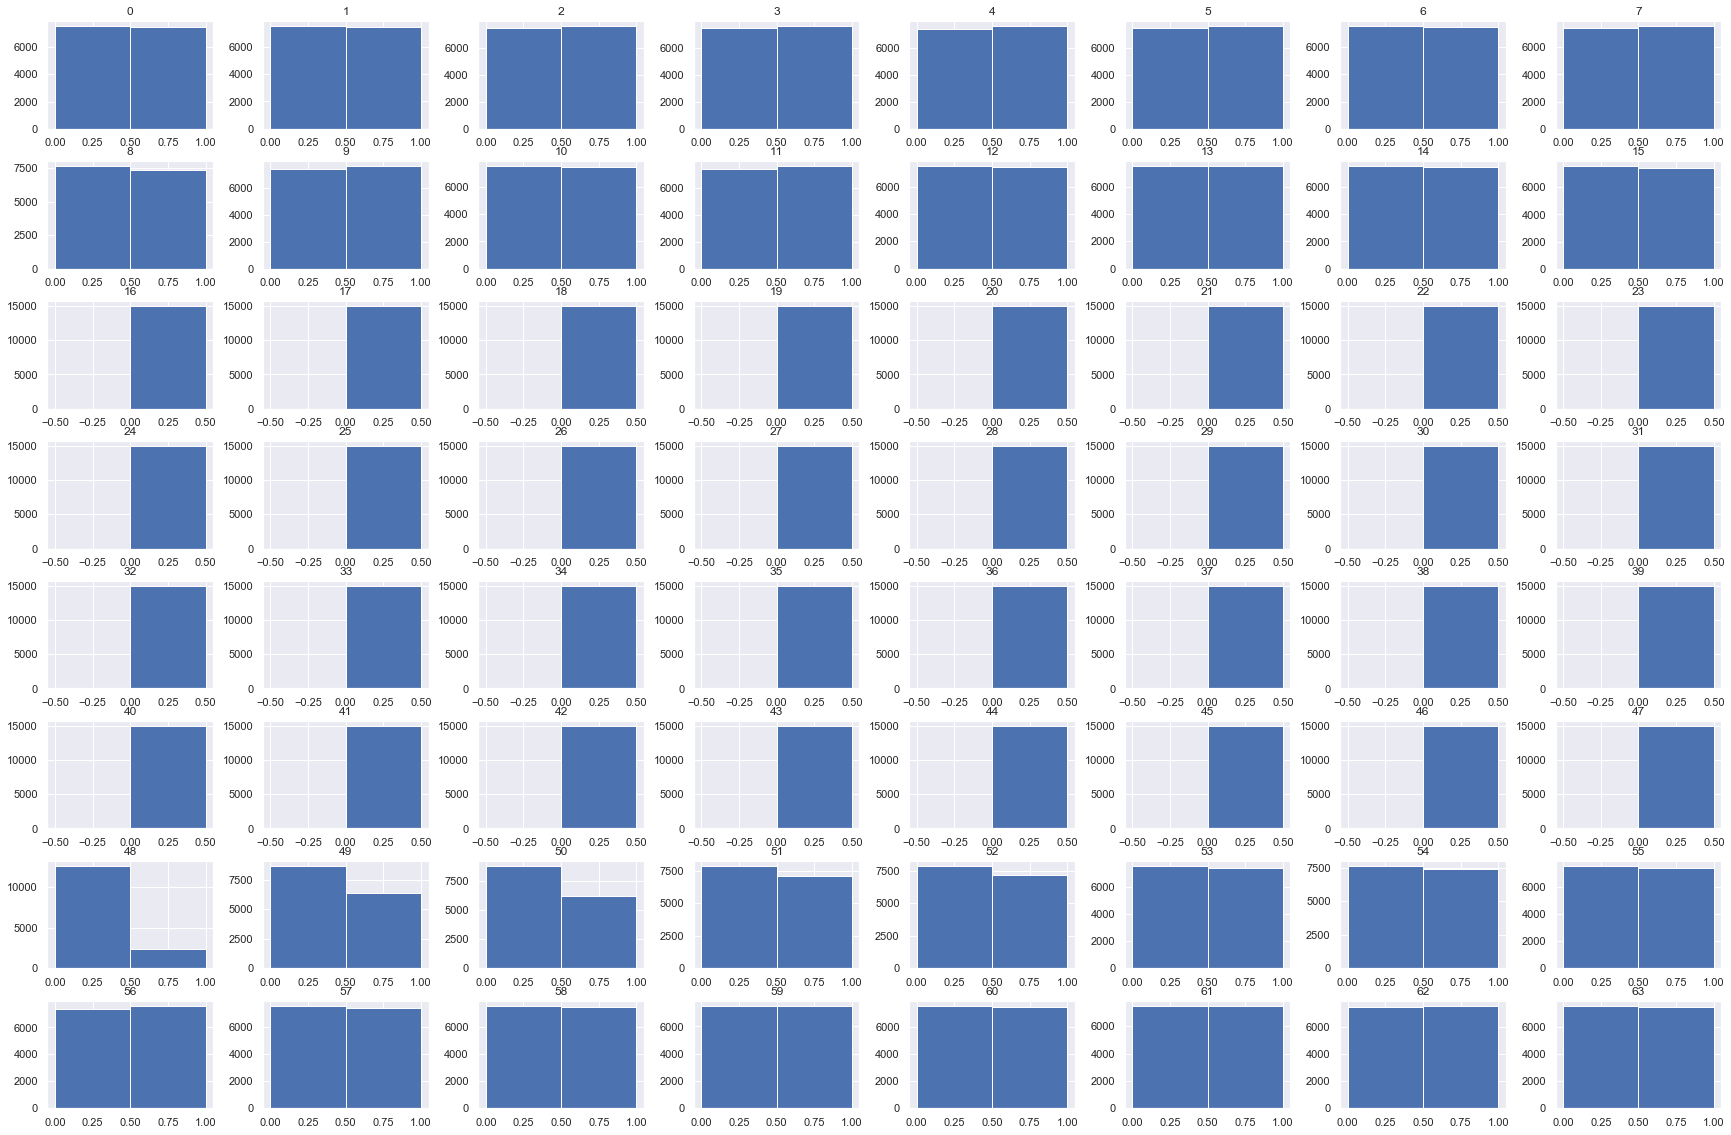

In [370]:
seed_bits.hist(figsize=(30, 20), bins=2)

In [371]:
np.binary_repr(23757, width=64)

'0000000000000000000000000000000000000000000000000101110011001101'

In [372]:
np.binary_repr(33254, width=64)

'0000000000000000000000000000000000000000000000001000000111100110'

In [373]:
2**15

32768

In [374]:
2**24

16777216

In [389]:
42736*2**16

2800746496

In [376]:
def seed2pairs(s):
    a = list(np.binary_repr(s, width=64))
    return list(map(lambda x: int(''.join(x), 2), (zip(a[::2], a[1::2]))))

seed_pairs = pd.DataFrame(df['seed'].apply(lambda x: seed2pairs(x)).tolist())

In [377]:
seed_pairs.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
25    int64
26    int64
27    int64
28    int64
29    int64
30    int64
31    int64
dtype: object

In [378]:
seed_pairs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0,2,1,2,0,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,0,3,3,0,0,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
2,2,1,0,0,1,1,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3
3,3,2,2,1,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3
4,1,3,3,2,1,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1,3,2,1,3,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,3,1,1,0,1
14996,2,1,0,3,2,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,3,1,1,2,3
14997,2,3,0,2,1,3,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,3,1,1,0,3
14998,2,3,2,1,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,3,1,1,0,3


In [379]:
seed_pairs.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
count,15000.000000,15000.0000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000
mean,1.494267,1.5156,1.520067,1.499933,1.489200,1.500333,1.497733,1.493467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.739200,1.300267,1.445867,1.477000,1.508333,1.49260,1.494400,1.504000
std,1.116923,1.1248,1.118905,1.119323,1.112939,1.112811,1.116458,1.118589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.713595,1.130218,1.119503,1.117775,1.118458,1.11906,1.113935,1.122528
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000
50%,1.000000,2.0000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.00000,1.000000,2.000000
75%,2.000000,3.0000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2.000000,2.000000,2.000000,3.000000,2.00000,2.000000,3.000000
max,3.000000,3.0000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0C029EC88>,
      dtype=object)

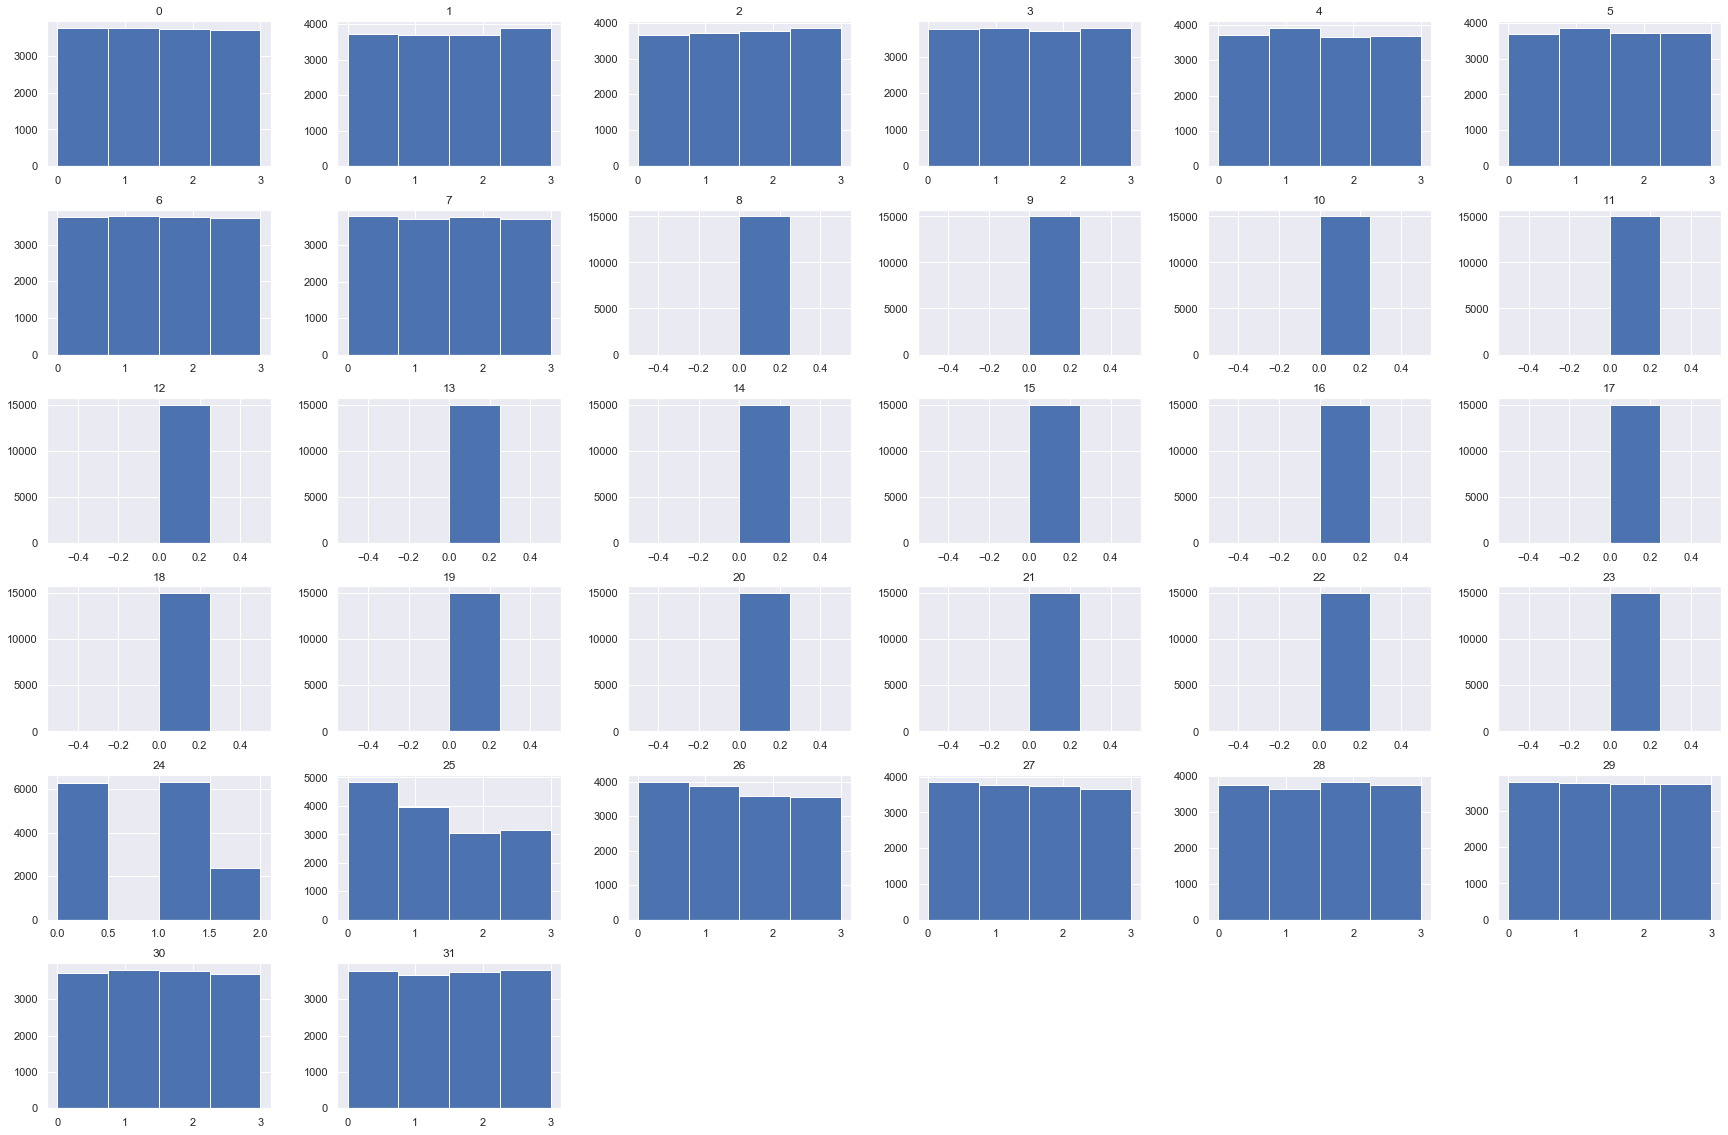

In [380]:
seed_pairs.hist(figsize=(30, 20), bins=4)

In [381]:
seed_bits.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,1.000000,-0.002543,0.016048,0.014587,-0.004596,0.021913,-0.002019,0.005637,0.001782,0.001270,0.009841,0.004321,0.005057,0.003331,-0.008811,-0.000173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001448,0.000485,-0.009897,0.002564,-0.004903,0.009956,-0.000749,-0.000850,0.003932,0.008216,0.000371,-0.000545,0.011443,-0.015337,0.003495,0.008648
1,-0.002543,1.000000,-0.007846,-0.014110,0.002966,0.006288,0.003458,0.000417,0.004362,0.011500,0.001455,-0.017443,-0.007338,-0.006934,-0.004138,-0.005085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002912,0.013972,0.005310,-0.009722,-0.007314,0.011180,0.005030,-0.004957,0.004830,0.004377,-0.004280,0.002261,-0.000144,0.005065,0.002013,0.008792
2,0.016048,-0.007846,1.000000,0.015223,-0.012021,-0.005165,0.000440,0.004188,-0.016621,-0.008551,0.010455,0.005751,-0.006914,0.002539,-0.006378,0.016753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004153,0.003047,0.001091,0.008924,-0.007116,-0.005371,0.009378,-0.016694,0.020798,-0.003890,0.008462,0.002692,-0.005548,-0.016126,0.010607,0.003107
3,0.014587,-0.014110,0.015223,1.000000,-0.001237,0.003491,-0.001822,-0.005022,-0.006330,0.008368,0.020996,0.008538,-0.009978,-0.006928,0.000959,0.004896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003731,-0.002029,-0.006144,-0.003164,0.001354,0.019843,0.005532,-0.004546,-0.001489,0.001324,0.001402,0.014029,-0.005942,-0.002125,0.000066,0.014446
4,-0.004596,0.002966,-0.012021,-0.001237,1.000000,0.002119,0.002995,-0.001853,-0.005457,-0.005562,-0.005118,-0.002977,0.009765,0.006942,-0.004366,-0.006271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001266,-0.001134,0.006480,0.009592,0.000751,0.000946,-0.004267,-0.001303,0.001123,-0.001565,0.006227,0.002039,-0.006722,-0.006389,-0.010626,0.007528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.000545,0.002261,0.002692,0.014029,0.002039,-0.008242,-0.016677,-0.009314,0.000220,-0.004896,-0.006414,0.003230,-0.001872,-0.000401,0.012261,-0.012955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018814,-0.002960,0.005104,0.008548,0.003212,-0.012958,0.002756,0.003706,0.001769,0.006639,0.002251,1.000000,-0.002947,0.008665,0.016282,0.006523
60,0.011443,-0.000144,-0.005548,-0.005942,-0.006722,-0.003416,0.008646,0.007241,0.007906,-0.011524,0.011439,0.003527,-0.011744,-0.005203,-0.001612,-0.014578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000610,-0.008505,0.026567,-0.003337,-0.001191,-0.011651,0.015244,-0.006990,-0.007795,0.003943,0.007035,-0.002947,1.000000,-0.009204,0.003231,0.008113
61,-0.015337,0.005065,-0.016126,-0.002125,-0.006389,0.002808,0.000797,0.003340,0.006787,-0.003988,-0.005471,0.003610,-0.016668,-0.003734,0.006532,0.006393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008568,-0.002284,-0.001495,-0.000308,-0.002175,0.011193,0.000786,-0.000142,-0.005056,-0.002542,-0.019205,0.008665,-0.009204,1.000000,0.009738,-0.008270
62,0.003495,0.002013,0.010607,0.000066,-0.010626,-0.000058,-0.011310,-0.004314,0.003844,-0

In [382]:
sister_corr = seed_bits.corr().iloc[list(range(0,16)), list(range(0,16))]
sister_corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000,-0.002543,0.016048,0.014587,-0.004596,0.021913,-0.002019,0.005637,0.001782,0.001270,0.009841,0.004321,0.005057,0.003331,-0.008811,-0.000173
1,-0.002543,1.000000,-0.007846,-0.014110,0.002966,0.006288,0.003458,0.000417,0.004362,0.011500,0.001455,-0.017443,-0.007338,-0.006934,-0.004138,-0.005085
2,0.016048,-0.007846,1.000000,0.015223,-0.012021,-0.005165,0.000440,0.004188,-0.016621,-0.008551,0.010455,0.005751,-0.006914,0.002539,-0.006378,0.016753
3,0.014587,-0.014110,0.015223,1.000000,-0.001237,0.003491,-0.001822,-0.005022,-0.006330,0.008368,0.020996,0.008538,-0.009978,-0.006928,0.000959,0.004896
4,-0.004596,0.002966,-0.012021,-0.001237,1.000000,0.002119,0.002995,-0.001853,-0.005457,-0.005562,-0.005118,-0.002977,0.009765,0.006942,-0.004366,-0.006271
5,0.021913,0.006288,-0.005165,0.003491,0.002119,1.000000,-0.006495,-0.001943,0.003645,0.002388,-0.001547,0.016422,-0.001847,0.006272,0.004556,-0.009384
6,-0.002019,0.003458,0.000440,-0.001822,0.002995,-0.006495,1.000000,0.002832,-0.010875,0.006194,-0.009755,0.009514,-0.001208,-0.002402,0.003324,-0.015501
7,0.005637,0.000417,0.004188,-0.005022,-0.001853,-0.001943,0.002832,1.000000,0.011879,-0.006385,-0.011691,0.002042,-0.001851,-0.000929,0.000818,0.003134
8,0.001782,0.004362,-0.016621,-0.006330,-0.005457,0.003645,-0.010875,0.011879,1.000000,-0.011064,0.001767,-0.001655,-0.000837,-0.003877,0.002359,-0.008291
9,0.001270,0.011500,-0.008551,0.008368,-0.005562,0.002388,0.006194,-0.006385,-0.011064,1.000000,0.009016,0.003961,0.008698,-0.007460,-0.008367,0.000928


In [383]:
import seaborn as sns
sns.set()


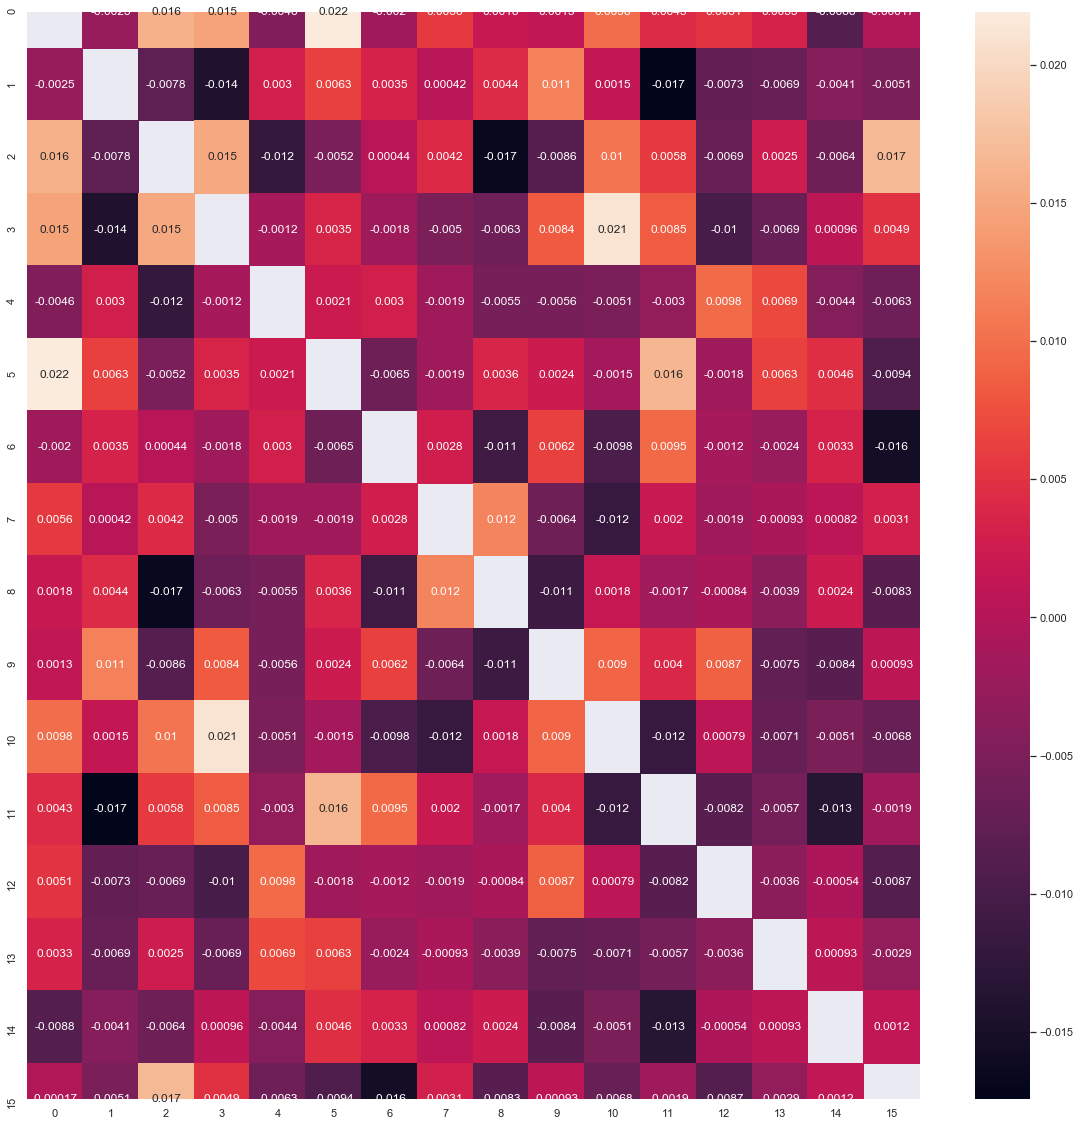

In [384]:
plt.figure(figsize=(20, 20))
sns.heatmap(sister_corr, annot=True, mask=np.eye(16))

(array([ 4.,  2.,  2.,  2.,  8.,  6., 12., 10., 20., 18.,  6., 22., 14.,
        10., 20., 22., 12.,  8.,  8.,  6.,  8.,  2.,  4.,  0.,  4.,  4.,
         2.,  0.,  0.,  4.]),
 array([-0.01744313, -0.01613125, -0.01481937, -0.01350748, -0.0121956 ,
        -0.01088372, -0.00957183, -0.00825995, -0.00694807, -0.00563618,
        -0.0043243 , -0.00301242, -0.00170053, -0.00038865,  0.00092323,
         0.00223512,  0.003547  ,  0.00485888,  0.00617077,  0.00748265,
         0.00879453,  0.01010642,  0.0114183 ,  0.01273018,  0.01404207,
         0.01535395,  0.01666583,  0.01797772,  0.0192896 ,  0.02060148,
         0.02191337]),
 <a list of 30 Patch objects>)

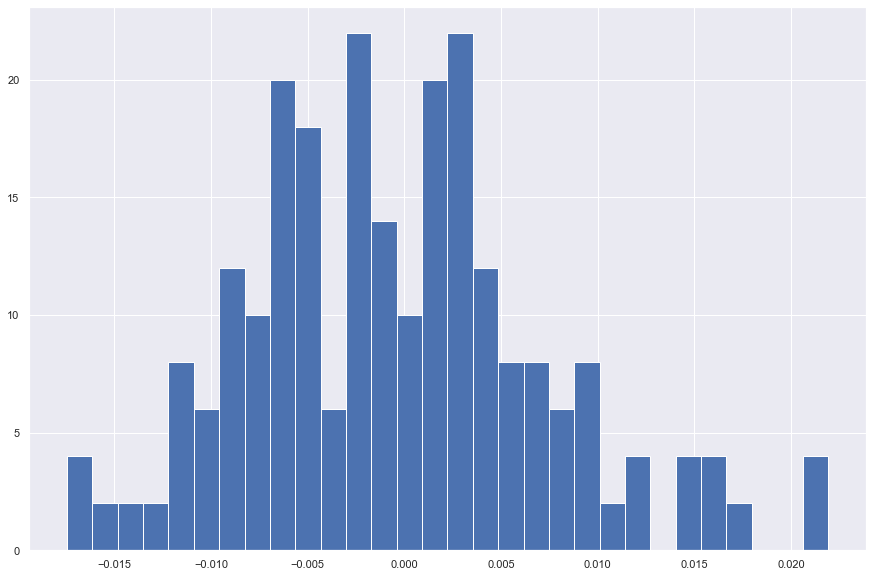

In [385]:
a = sister_corr.to_numpy().flatten()
a = a[a < 1]
plt.figure(figsize=(15, 10))
plt.hist(a, bins=30)

In [386]:
lsb_corr = seed_bits.corr().iloc[list(range(51,64)), list(range(51,64))]
lsb_corr

,51,52,53,54,55,56,57,58,59,60,61,62,63
51,1.000000,-0.061080,0.010723,-0.004107,0.004653,-0.007033,0.002771,-0.003519,0.008548,-0.003337,-0.000308,-0.004365,0.009942
52,-0.061080,1.000000,0.005667,0.002068,0.005741,0.002287,-0.003884,0.001032,0.003212,-0.001191,-0.002175,0.017251,0.006744
53,0.010723,0.005667,1.000000,-0.003636,0.008297,-0.003334,0.012295,0.007408,-0.012958,-0.011651,0.011193,0.001791,0.019163
54,-0.004107,0.002068,-0.003636,1.000000,-0.000323,-0.010692,-0.018465,-0.000641,0.002756,0.015244,0.000786,-0.005362,-0.005405
55,0.004653,0.005741,0.008297,-0.000323,1.000000,0.001350,0.014282,-0.002066,0.003706,-0.006990,-0.000142,0.006999,0.016358
56,-0.007033,0.002287,-0.003334,-0.010692,0.001350,1.000000,0.001087,0.014220,0.001769,-0.007795,-0.005056,-0.017018,0.001389
57,0.002771,-0.003884,0.012295,-0.018465,0.014282,0.001087,1.000000,0.002199,0.006639,0.003943,-0.002542,0.006200,0.013690
58,-0.003519,0.001032,0.007408,-0.000641,-0.002066,0.014220,0.002199,1.000000,0.002251,0.007035,-0.019205,-0.002230,0.013309
59,0.008548,0.003212,-0.012958,0.002756,0.003706,0.001769,0.006639,0.002251,1.000000,-0.002947,0.008665,0.016282,0.006523
60,-0.003337,-0.001191,-0.011651,0.015244,-0.006990,-0.007795,0.003943,0.007035,-0.002947,1.000000,-0.009204,0.003231,0.008113


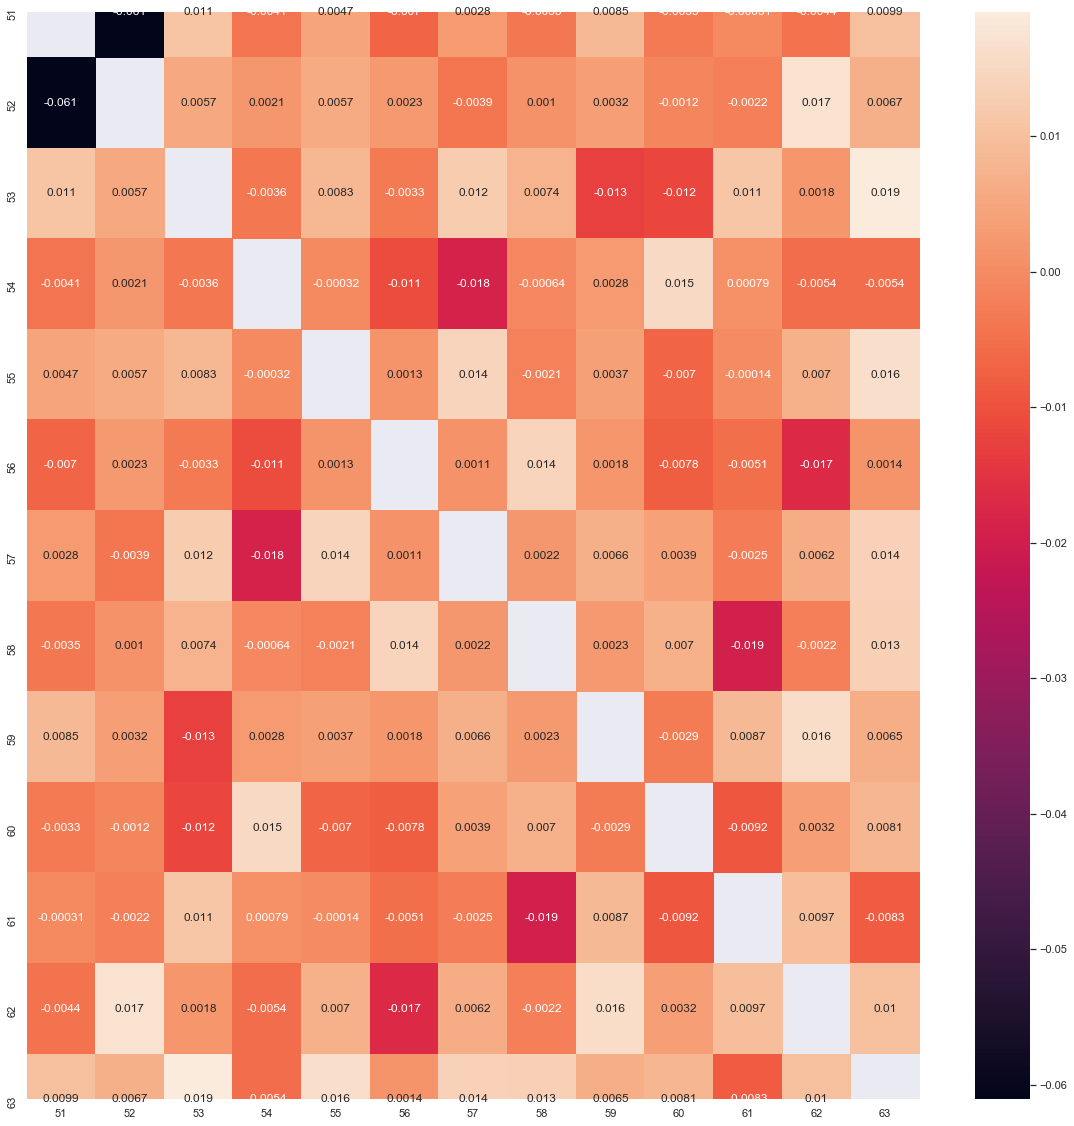

In [387]:
plt.figure(figsize=(20, 20))
sns.heatmap(lsb_corr, annot=True, mask=np.eye(13))

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  4.,  2.,  2.,  4.,  6., 10., 18., 16., 26., 14., 18.,
        12.,  8., 10.,  4.]),
 array([-0.06108025, -0.05840549, -0.05573073, -0.05305596, -0.0503812 ,
        -0.04770644, -0.04503168, -0.04235691, -0.03968215, -0.03700739,
        -0.03433262, -0.03165786, -0.0289831 , -0.02630833, -0.02363357,
        -0.02095881, -0.01828405, -0.01560928, -0.01293452, -0.01025976,
        -0.00758499, -0.00491023, -0.00223547,  0.0004393 ,  0.00311406,
         0.00578882,  0.00846358,  0.01113835,  0.01381311,  0.01648787,
         0.01916264]),
 <a list of 30 Patch objects>)

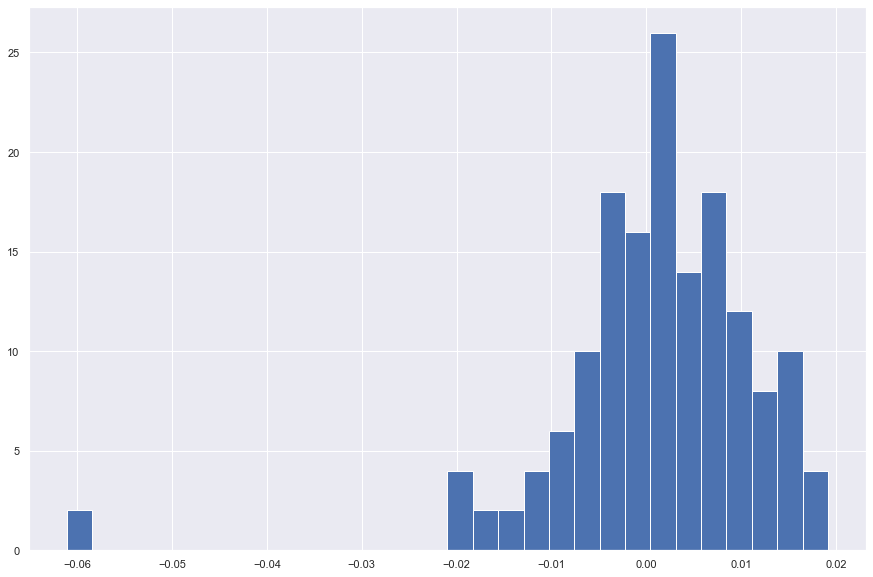

In [388]:
b = lsb_corr.to_numpy().flatten()
b = b[b < 1]
plt.figure(figsize=(15, 10))
plt.hist(b, bins=30)

In [ ]:
# todo: maybe try to find some seeds using biome device and see if their bits are correlated?